In [15]:
pip install yellowbrick


   ---------------------------------------- 0.0/282.6 kB ? eta -:--:--
   - -------------------------------------- 10.2/282.6 kB ? eta -:--:--
   - -------------------------------------- 10.2/282.6 kB ? eta -:--:--
   ----- --------------------------------- 41.0/282.6 kB 326.8 kB/s eta 0:00:01
   ----- --------------------------------- 41.0/282.6 kB 326.8 kB/s eta 0:00:01
   -------- ------------------------------ 61.4/282.6 kB 272.3 kB/s eta 0:00:01
   -------- ------------------------------ 61.4/282.6 kB 272.3 kB/s eta 0:00:01
   ------------ -------------------------- 92.2/282.6 kB 275.8 kB/s eta 0:00:01
   ------------ -------------------------- 92.2/282.6 kB 275.8 kB/s eta 0:00:01
   ---------------- --------------------- 122.9/282.6 kB 288.1 kB/s eta 0:00:01
   ------------------- ------------------ 143.4/282.6 kB 293.9 kB/s eta 0:00:01
   ------------------- ------------------ 143.4/282.6 kB 293.9 kB/s eta 0:00:01
   ------------------- ------------------ 143.4/282.6 kB 293.9 kB


[notice] A new release of pip is available: 24.1.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


<div style="border-radius:10px; padding: 30px; background-color: #c0e5e9; font-size:90%; text-align:left">
    <p style="font-family:Georgia; font-size:400%;font-weight:bold;text-align:center;color:navy;">
        📱 Mobile Price Prediction 📱
    </p>
    
<p style="font-family:newtimeroman; font-size:300%;font-weight:bold;text-align:center;color:navy;">
        📉by Decision Tree, Random Forest & SVM📈
    </p>
    
<p style="font-family:newtimeroman; font-size:200%;font-weight:bold;text-align:center;color:navy;">
        Members : Moksha Bhandari , Het Amin
    </p>
</div>

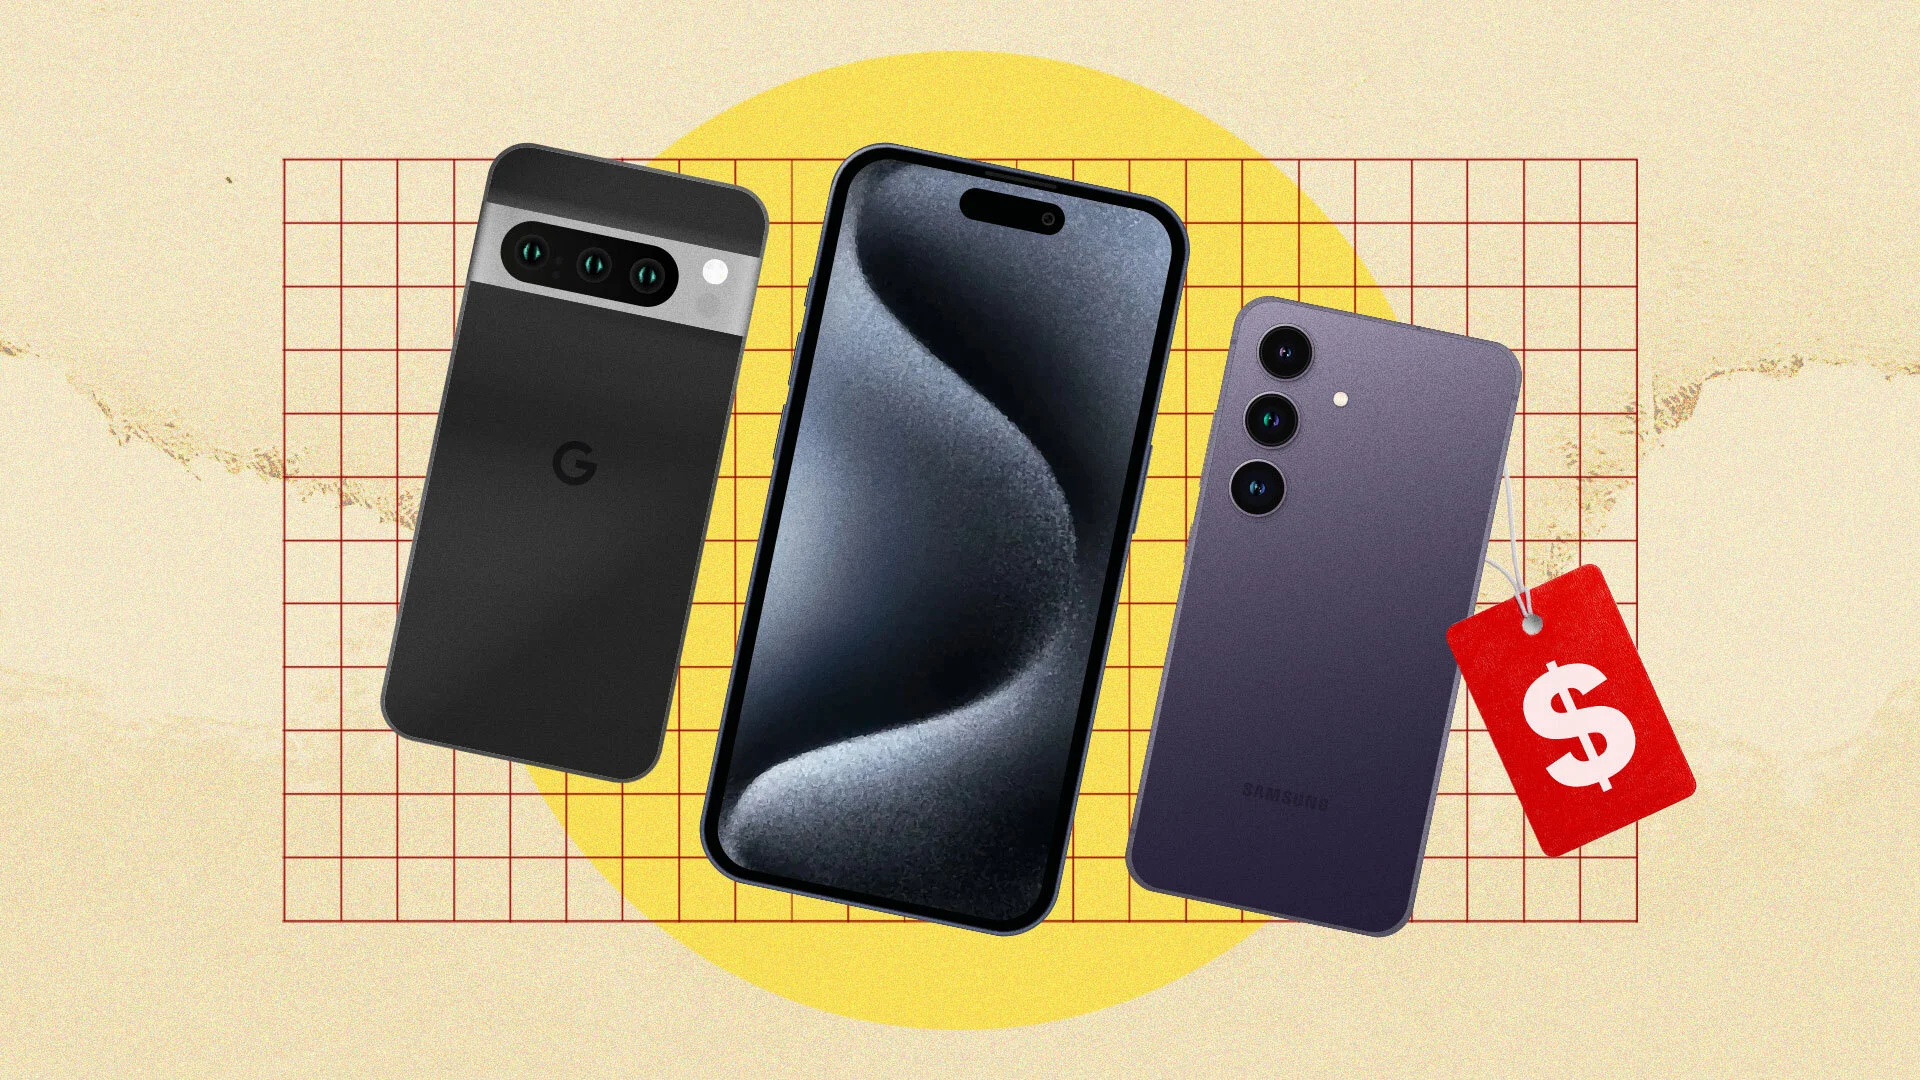

<a id="c_table"></a> 

<div style="border-radius:10px; padding: 15px; background-color: #c0e5e9; font-size:115%; text-align:left">

<h3 align="left"><font color=navy>Table of Contents:</font></h3>
<font color=navy>
        
* [1 | Libraries📚](#lib)
* [2 | Importing Dataset🗄](#data)
* [3 | Dataset Description📖](#datades)
* [4 | Preprocessing🎓](#preprocessing)
    - [4.1 - Drop abnormal columns](#Drop)
    - [4.2 - Adding New Feature by Multiplying](#new_feature)
* [5 | Visualizing📈](#Visualizing)
* [6 | Decision Tree📊](#DT)
* [7 | Random Forest📊](#RF)
* [8 | SVM📊](#svm)    
* [9 | predict unseen data💸](#Predict)

<a id="lib"></a>
# <p style="background-color:powderblue; font-family:roboto; color:navy; font-size:145%;font-weight:bold; text-align:center; border-radius:25px 10px; padding: 10px">1 - Libraries 📚</p>

⬆️ [Table of Contents](#c_table)

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import FancyBboxPatch
import matplotlib.colors as mcolors
import seaborn as sns

from yellowbrick.classifier import ROCAUC

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, learning_curve
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler, StandardScaler

import warnings
warnings.simplefilter("ignore", category=UserWarning)

<a id="data"></a>
# <p style="background-color:powderblue; font-family:roboto; color:navy; font-size:145%;font-weight:bold; text-align:center; border-radius:25px 10px; padding: 10px">2 - Importing Dataset🗄</p>

⬆️ [Table of Contents](#c_table)

In [3]:
train_data = pd.read_csv('CellPhone_train.csv')
df = pd.DataFrame(train_data)
df.head()

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  m_dep  \
0            842     0          2.2         0   1       0           7    0.6   
1           1021     1          0.5         1   0       1          53    0.7   
2            563     1          0.5         1   2       1          41    0.9   
3            615     1          2.5         0   0       0          10    0.8   
4           1821     1          1.2         0  13       1          44    0.6   

   mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  talk_time  \
0        188        2  ...         20       756  2549     9     7         19   
1        136        3  ...        905      1988  2631    17     3          7   
2        145        5  ...       1263      1716  2603    11     2          9   
3        131        6  ...       1216      1786  2769    16     8         11   
4        141        2  ...       1208      1212  1411     8     2         15   

   three_g  touch_screen  wifi  price_range  
0        0             0     1            1  
1        1             1     0            2  
2        1             1     0            2  
3        1             0     0            2  
4        1             1     0            1  

[5 rows x 21 columns]

In [4]:
test_data = pd.read_csv('CellPhone_test.csv')
test_df = pd.DataFrame(test_data)
test_df.head()

id  battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
0   1           1043     1          1.8         1  14       0           5   
1   2            841     1          0.5         1   4       1          61   
2   3           1807     1          2.8         0   1       0          27   
3   4           1546     0          0.5         1  18       1          25   
4   5           1434     0          1.4         0  11       1          49   

   m_dep  mobile_wt  ...  pc  px_height  px_width   ram  sc_h  sc_w  \
0    0.1        193  ...  16        226      1412  3476    12     7   
1    0.8        191  ...  12        746       857  3895     6     0   
2    0.9        186  ...   4       1270      1366  2396    17    10   
3    0.5         96  ...  20        295      1752  3893    10     0   
4    0.5        108  ...  18        749       810  1773    15     8   

   talk_time  three_g  touch_screen  wifi  
0          2        0             1     0  
1          7        1             0     0  
2         10        0             1     1  
3          7        1             1     0  
4          7        1             0     1  

[5 rows x 21 columns]

<a id="datades"></a>
# <p style="background-color:powderblue; font-family:roboto; color:navy; font-size:145%;font-weight:bold; text-align:center; border-radius:25px 10px; padding: 10px">3 - Dataset Description📖</p>

⬆️ [Table of Contents](#c_table)

    <div style="border-radius:10px; padding: 15px; font-size:115%; text-align:left">

    <h3 align="left"><font color=cyan>Dataset Description:</font></h3>
        
    | __Index__      | __Variable__ | __Description__      |
    |:----|:----|:----|
    | 1  | __battery_power__ | _The maximum energy capacity of the mobile phone's battery, measured in milliamp hours (mAh)._ |
    | 2  | __blue__ | _Indicates the presence of Bluetooth functionality (1: Yes, 0: No)._ |
    | 3  | __clock_speed__ | _The processing speed of the mobile phone's microprocessor, measured in gigahertz (GHz)._ |
    | 4  | __dual_sim__ | _Indicates whether the mobile phone supports dual SIM cards (1: Yes, 0: No)._ |
    | 5  | __fc__ | _The resolution of the front camera, measured in megapixels (MP)._ |
    | 6  | __four_g__ | _Indicates whether the mobile phone supports 4G network connectivity (1: Yes, 0: No).._ |
    | 7  | __int_memory__ | _The internal storage capacity of the mobile phone, measured in gigabytes (GB)._ |
    | 8  | __m_dep__ | _The thickness of the mobile phone, measured in centimeters (cm)._ |
    | 9  | __mobile_wt__ | _The weight of the mobile phone, measured in grams (g)._ |
    | 10  | __n_cores__ | _The number of cores in the mobile phone's processor._ |
    | 11  | __pc__ | _The resolution of the primary (rear) camera, measured in megapixels (MP)._ |
    | 12  | __px_height__ | _The height of the screen's resolution, measured in pixels._ |
    | 13  | __px_width__ | _The width of the screen's resolution, measured in pixels._ |
    | 14  | __ram__ | _The amount of Random Access Memory (RAM) available in the mobile phone, measured in megabytes (MB)._ |
    | 15  | __sc_h__ | _The height of the mobile phone's screen, measured in centimeters (cm)._ |
    | 16  | __sc_w__ | _The width of the mobile phone's screen, measured in centimeters (cm)._ |
    | 17  | __talk_time__ | _The maximum duration the phone can be used for talking on a single battery charge, measured in hours._ |
    | 18  | __three_g__ | _Indicates whether the mobile phone supports 3G network connectivity (1: Yes, 0: No)._ |
    | 19  | __touch_screen__ | _Indicates whether the mobile phone has a touch-sensitive screen (1: Yes, 0: No)._ |
    | 20  | __wifi__ | _Indicates whether the mobile phone supports Wi-Fi connectivity (1: Yes, 0: No)._ |
    | 21  | __price_range__ | _The target variable indicating the price range of the mobile phone, with values: 0 (low cost), 1 (medium cost), 2 (high cost), and 3 (very high cost)._ |

In [5]:
print('\n Train Dataset summary : \n')

pd.concat([pd.DataFrame(df.count()).T.rename(index={0: 'count'}),
           pd.DataFrame(df.nunique()).T.rename(index={0: 'number of unique'}),
           pd.DataFrame(df.dtypes).T.rename(index={0: 'dtype'}),
           pd.DataFrame(df.notnull().sum()).T.rename(index={0: 'non-null count'}),
           df.describe().drop('count')]).T


 Train Dataset summary : 



count number of unique    dtype non-null count       mean  \
battery_power  2000             1094    int64           2000  1238.5185   
blue           2000                2    int64           2000      0.495   
clock_speed    2000               26  float64           2000    1.52225   
dual_sim       2000                2    int64           2000     0.5095   
fc             2000               20    int64           2000     4.3095   
four_g         2000                2    int64           2000     0.5215   
int_memory     2000               63    int64           2000    32.0465   
m_dep          2000               10  float64           2000    0.50175   
mobile_wt      2000              121    int64           2000    140.249   
n_cores        2000                8    int64           2000     4.5205   
pc             2000               21    int64           2000     9.9165   
px_height      2000             1137    int64           2000    645.108   
px_width       2000             1109    int64           2000  1251.5155   
ram            2000             1562    int64           2000   2124.213   
sc_h           2000               15    int64           2000    12.3065   
sc_w           2000               19    int64           2000      5.767   
talk_time      2000               19    int64           2000     11.011   
three_g        2000                2    int64           2000     0.7615   
touch_screen   2000                2    int64           2000      0.503   
wifi           2000                2    int64           2000      0.507   
price_range    2000                4    int64           2000        1.5   

                       std    min     25%     50%      75%     max  
battery_power   439.418206  501.0  851.75  1226.0  1615.25  1998.0  
blue                0.5001    0.0     0.0     0.0      1.0     1.0  
clock_speed       0.816004    0.5     0.7     1.5      2.2     3.0  
dual_sim          0.500035    0.0     0.0     1.0      1.0     1.0  
fc                4.341444    0.0     1.0     3.0      7.0    19.0  
four_g            0.499662    0.0     0.0     1.0      1.0     1.0  
int_memory       18.145715    2.0    16.0    32.0     48.0    64.0  
m_dep             0.288416    0.1     0.2     0.5      0.8     1.0  
mobile_wt        35.399655   80.0   109.0   141.0    170.0   200.0  
n_cores           2.287837    1.0     3.0     4.0      7.0     8.0  
pc                6.064315    0.0     5.0    10.0     15.0    20.0  
px_height       443.780811    0.0  282.75   564.0   947.25  1960.0  
px_width        432.199447  500.0  874.75  1247.0   1633.0  1998.0  
ram            1084.732044  256.0  1207.5  2146.5   3064.5  3998.0  
sc_h              4.213245    5.0     9.0    12.0     16.0    19.0  
sc_w              4.356398    0.0     2.0     5.0      9.0    18.0  
talk_time         5.463955    2.0     6.0    11.0     16.0    20.0  
three_g           0.426273    0.0     1.0     1.0      1.0     1.0  
touch_screen      0.500116    0.0     0.0     1.0      1.0     1.0  
wifi              0.500076    0.0     0.0     1.0      1.0     1.0  
price_range       1.118314    0.0    0.75     1.5     2.25     3.0

In [6]:
print('\n Test Dataset summary : \n')

pd.concat([pd.DataFrame(test_df.count()).T.rename(index={0: 'count'}),
           pd.DataFrame(test_df.nunique()).T.rename(index={0: 'number of unique'}),
           pd.DataFrame(test_df.dtypes).T.rename(index={0: 'dtype'}),
           pd.DataFrame(test_df.notnull().sum()).T.rename(index={0: 'non-null count'}),
           test_df.describe().drop('count')]).T


 Test Dataset summary : 



count number of unique    dtype non-null count      mean  \
id             1000             1000    int64           1000     500.5   
battery_power  1000              721    int64           1000   1248.51   
blue           1000                2    int64           1000     0.516   
clock_speed    1000               26  float64           1000    1.5409   
dual_sim       1000                2    int64           1000     0.517   
fc             1000               20    int64           1000     4.593   
four_g         1000                2    int64           1000     0.487   
int_memory     1000               63    int64           1000    33.652   
m_dep          1000               10  float64           1000    0.5175   
mobile_wt      1000              121    int64           1000   139.511   
n_cores        1000                8    int64           1000     4.328   
pc             1000               21    int64           1000    10.054   
px_height      1000              694    int64           1000   627.121   
px_width       1000              743    int64           1000  1239.774   
ram            1000              872    int64           1000  2138.998   
sc_h           1000               15    int64           1000    11.995   
sc_w           1000               19    int64           1000     5.316   
talk_time      1000               19    int64           1000    11.085   
three_g        1000                2    int64           1000     0.756   
touch_screen   1000                2    int64           1000       0.5   
wifi           1000                2    int64           1000     0.507   

                       std    min      25%     50%      75%     max  
id              288.819436    1.0   250.75   500.5   750.25  1000.0  
battery_power   432.458227  500.0    895.0  1246.5  1629.25  1999.0  
blue              0.499994    0.0      0.0     1.0      1.0     1.0  
clock_speed       0.829268    0.5      0.7     1.5      2.3     3.0  
dual_sim          0.499961    0.0      0.0     1.0      1.0     1.0  
fc                4.463325    0.0      1.0     3.0      7.0    19.0  
four_g            0.500081    0.0      0.0     0.0      1.0     1.0  
int_memory       18.128694    2.0     18.0    34.5     49.0    64.0  
m_dep             0.280861    0.1      0.3     0.5      0.8     1.0  
mobile_wt         34.85155   80.0   109.75   139.0    170.0   200.0  
n_cores           2.288155    1.0      2.0     4.0      6.0     8.0  
pc                6.095099    0.0      5.0    10.0     16.0    20.0  
px_height       432.929699    0.0   263.75   564.5    903.0  1907.0  
px_width        439.670981  501.0   831.75  1250.0  1637.75  1998.0  
ram            1088.092278  263.0  1237.25  2153.5   3065.5  3989.0  
sc_h              4.320607    5.0      8.0    12.0     16.0    19.0  
sc_w              4.240062    0.0      2.0     5.0      8.0    18.0  
talk_time         5.497636    2.0     6.75    11.0     16.0    20.0  
three_g           0.429708    0.0      1.0     1.0      1.0     1.0  
touch_screen       0.50025    0.0      0.0     0.5      1.0     1.0  
wifi              0.500201    0.0      0.0     1.0      1.0     1.0

### Both datasets have similar ranges, means, and standard deviations for most features. This suggests that the distribution of features is fairly consistent across the training and test datasets.

<a id="preprocessing"></a>
# <p style="background-color:powderblue; font-family:roboto; color:navy; font-size:145%;font-weight:bold; text-align:center; border-radius:25px 10px; padding: 10px">4 - Preprocessing🎓</p>

⬆️ [Table of Contents](#c_table)

<a id="Drop"></a>
## <p style=" font-family:roboto; color:Pink; font-size:115%; text-align:left; padding: 0px">4.1 - <span style="color:Pink;font-weight:bold">Drop abnormal columns
    
⬆️ [Section](#preprocessing)

In [7]:
df.drop(columns = ['m_dep', 'sc_h', 'sc_w', 'px_height', 'px_width'], inplace = True)
df.head()

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
0            842     0          2.2         0   1       0           7   
1           1021     1          0.5         1   0       1          53   
2            563     1          0.5         1   2       1          41   
3            615     1          2.5         0   0       0          10   
4           1821     1          1.2         0  13       1          44   

   mobile_wt  n_cores  pc   ram  talk_time  three_g  touch_screen  wifi  \
0        188        2   2  2549         19        0             0     1   
1        136        3   6  2631          7        1             1     0   
2        145        5   6  2603          9        1             1     0   
3        131        6   9  2769         11        1             0     0   
4        141        2  14  1411         15        1             1     0   

   price_range  
0            1  
1            2  
2            2  
3            2  
4            1

<a id="new_feature"></a>
## <p style="font-family: Roboto; color: steelblue; font-size: 115%; text-align: left; padding: 0px;">4.2 - <span style="color: steelblue; font-weight: bold;">Adding New Feature by Multiplying</span></p>

⬆️ [Section](#preprocessing)

<div style="border-radius: 10px; padding: 10px; background-color: #c0e5e9; font-size: 115%; text-align: left;">
    <p style="color: navy;">
        We are creating a new feature by combining the 'clock_speed' and 'n_cores' features to derive a metric called 'performance'. This new feature aims to capture the computational power of the device based on its processor characteristics.
    </p>
</div>

In [9]:
# Create the new feature 'performance'
df['performance'] = df['clock_speed'] * df['n_cores']

<a id="Visualizing"></a>
# <p style="background-color:powderblue; font-family:roboto; color:navy; font-size:145%;font-weight:bold; text-align:center; border-radius:25px 10px; padding: 10px">5 - Visualizing📈</p>

⬆️ [Table of Contents](#c_table)

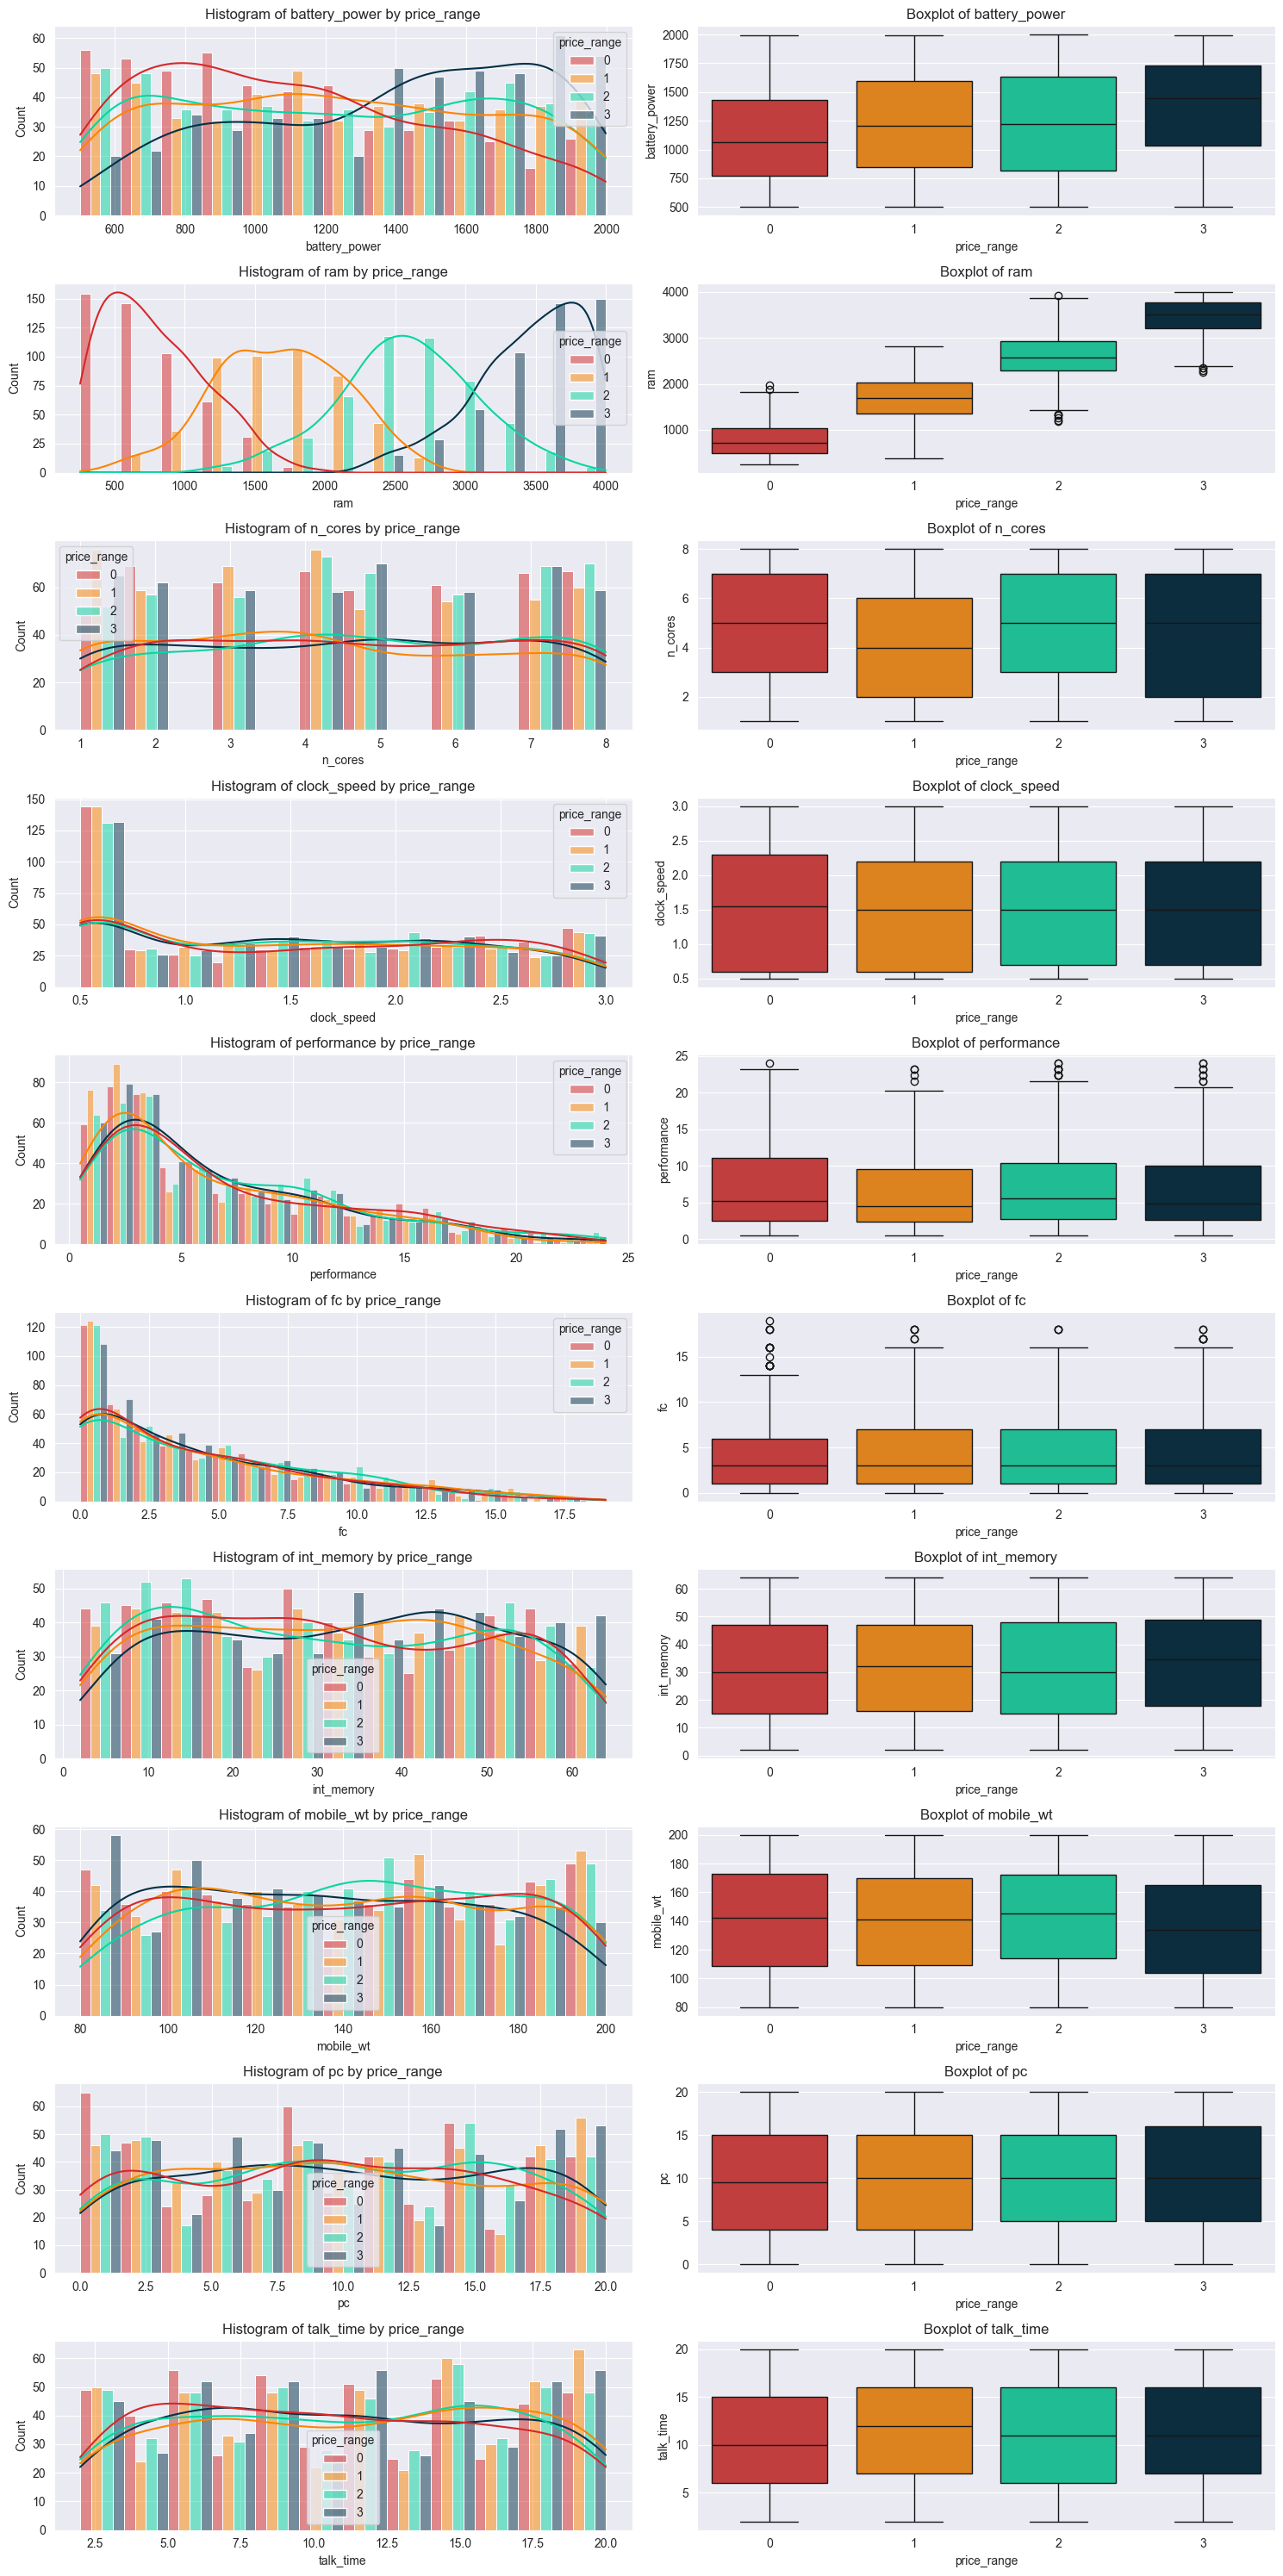

In [10]:
# Suppress warnings about future changes to Python or libraries to avoid cluttering the output
warnings.simplefilter(action='ignore', category=FutureWarning)

# Set the visual style of the plots to 'darkgrid' for better readability and aesthetics
sns.set_style('darkgrid')

# Define a custom palette for the four price ranges
#custom_palette = ['#fb8500', '#f4d35e', '#8ecae6', '#023047']
custom_palette = ['#d62828', '#fb8500', '#06d6a0', '#023047']
# Define a list of column names from the dataframe that we want to visualize
list_of_columns = ['battery_power', 'ram', 'n_cores', 'clock_speed', 'performance','fc', 'int_memory', 'mobile_wt', 'pc', 'talk_time']

# Create a subplot grid with 2 columns and a number of rows equal to the number of columns to visualize
fig, axs = plt.subplots(len(list_of_columns), 2, figsize=(15, 30))

# Loop through each column name, using 'enumerate' to get both the column name and the loop index
for i, columns_name in enumerate(list_of_columns):
    # Plot a histogram for each column, with data segmented by 'price_range' status
    sns.histplot(data=df, x=columns_name, hue='price_range', multiple='dodge', palette=custom_palette, kde = True, ax=axs[i, 0])
    
    # Set the title for each histogram to indicate what data it represents
    axs[i, 0].set_title(f'Histogram of {columns_name} by price_range')
    
    # Plot a boxplot for each column to show the distribution of values
    sns.boxplot(data=df, x='price_range', y =columns_name, ax=axs[i, 1], palette=custom_palette)
    
    # Set the title for each boxplot to indicate what data it represents
    axs[i, 1].set_title(f'Boxplot of {columns_name}')

# Adjust the layout of the subplots to prevent any overlapping of elements
plt.tight_layout()

plt.savefig('hist.png')

# Display the plots
plt.show()

# Reset the warning filter to default to ensure that future warnings are not suppressed
warnings.simplefilter(action='default', category=FutureWarning)


###        After analyzing the data, we found that the 'price_range' of mobile phones exhibits a strong positive correlation with the 'ram' (Random Access Memory) capacity. This correlation suggests that devices with higher RAM tend to be priced higher, reflecting the importance of memory capacity in consumer pricing decisions.

###        Additionally, we observed a moderate correlation between 'price_range' and 'battery_power', indicating that battery capacity also influences pricing to a lesser extent.

###        Interestingly, the newly created feature 'performance', derived from the product of 'clock_speed' and 'n_cores', did not provide significant additional explanatory power for predicting 'price_range'.
 

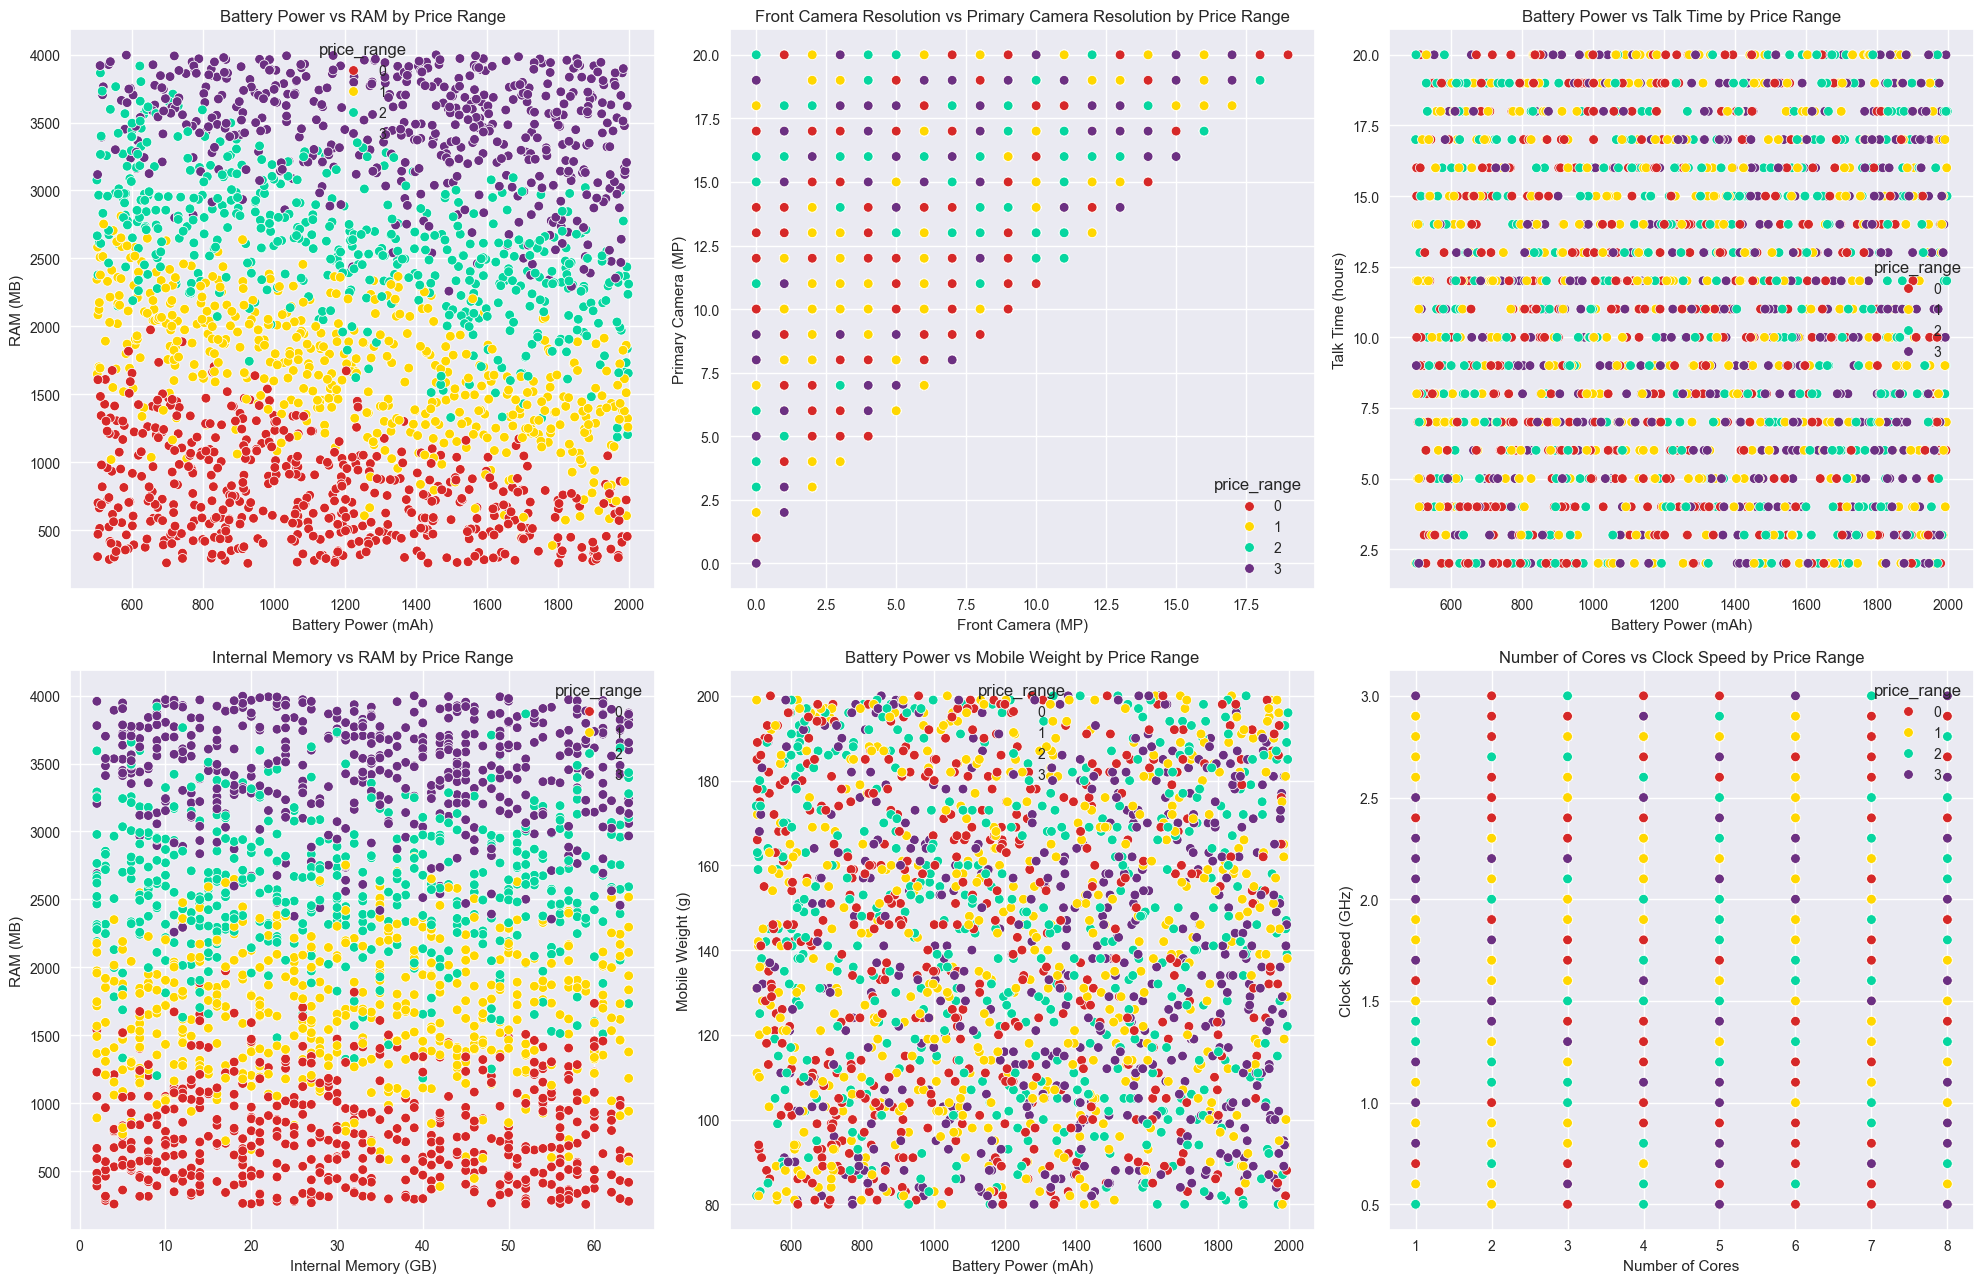

In [17]:
sns.set_style('darkgrid')

# Create a 2x3 subplot grid
fig, axs = plt.subplots(2, 3, figsize=(20, 13))

custom_palette = ['#d62828', '#FFD700', '#06d6a0', '#6C3082']

# Scatter plot with hue set to 'price_range'
sns.scatterplot(x='battery_power', y='ram', hue='price_range', data=df, ax=axs[0, 0], palette=custom_palette)
axs[0, 0].set_title('Battery Power vs RAM by Price Range')
axs[0, 0].set_xlabel('Battery Power (mAh)')
axs[0, 0].set_ylabel('RAM (MB)')

sns.scatterplot(x='fc', y='pc', hue='price_range', data=df, ax=axs[0, 1], palette=custom_palette)
axs[0, 1].set_title('Front Camera Resolution vs Primary Camera Resolution by Price Range')
axs[0, 1].set_xlabel('Front Camera (MP)')
axs[0, 1].set_ylabel('Primary Camera (MP)')

sns.scatterplot(x='battery_power', y='talk_time', hue='price_range', data=df, ax=axs[0, 2], palette=custom_palette)
axs[0, 2].set_title('Battery Power vs Talk Time by Price Range')
axs[0, 2].set_xlabel('Battery Power (mAh)')
axs[0, 2].set_ylabel('Talk Time (hours)')

sns.scatterplot(x='int_memory', y='ram', hue='price_range', data=df, ax=axs[1, 0], palette=custom_palette)
axs[1, 0].set_title('Internal Memory vs RAM by Price Range')
axs[1, 0].set_xlabel('Internal Memory (GB)')
axs[1, 0].set_ylabel('RAM (MB)')

sns.scatterplot(x='battery_power', y='mobile_wt', hue='price_range', data=df, ax=axs[1, 1], palette=custom_palette)
axs[1, 1].set_title('Battery Power vs Mobile Weight by Price Range')
axs[1, 1].set_xlabel('Battery Power (mAh)')
axs[1, 1].set_ylabel('Mobile Weight (g)')

sns.scatterplot(x='n_cores', y='clock_speed', hue='price_range', data=df, ax=axs[1, 2], palette=custom_palette)
axs[1, 2].set_title('Number of Cores vs Clock Speed by Price Range')
axs[1, 2].set_xlabel('Number of Cores')
axs[1, 2].set_ylabel('Clock Speed (GHz)')

# Adjust layout for a clean look
plt.tight_layout()

# Display the plots
plt.show()

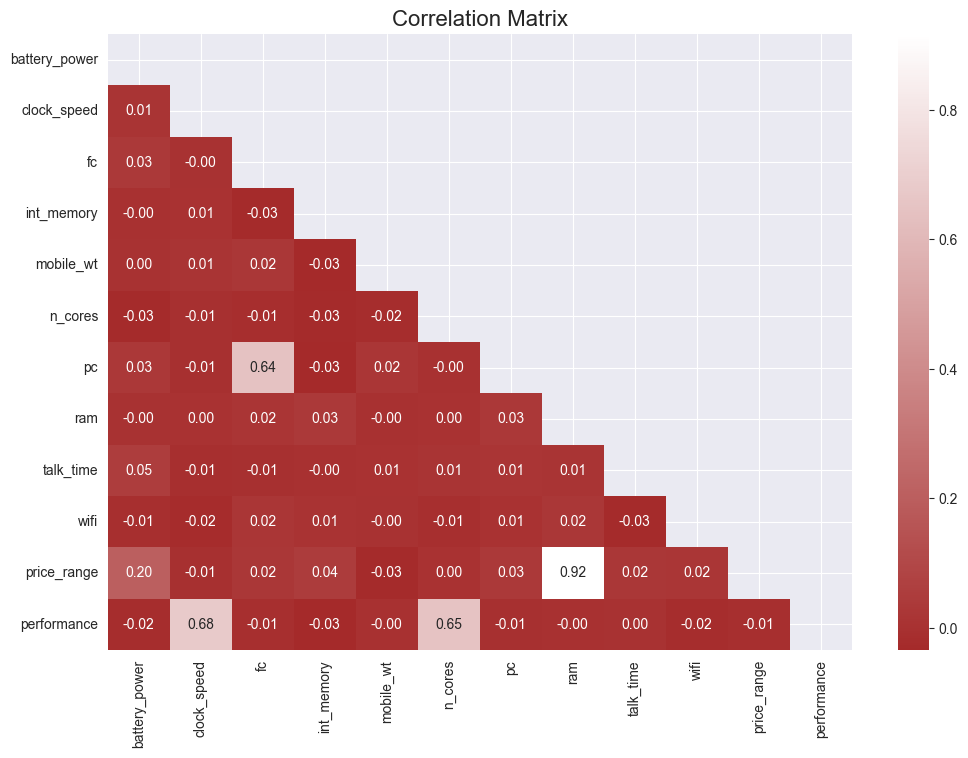

In [12]:
# Calculate the correlation matrix for the DataFrame
correlation_matrix = df.drop(columns = ['blue', 'dual_sim', 'four_g', 'three_g', 'touch_screen']).corr()

# Initialize a new figure with a specified figure size
plt.figure(figsize=(12, 8))

# Define the custom colors
colors = ['brown', 'white']

# Create the colormap
cmap = mcolors.LinearSegmentedColormap.from_list('custom_cmap', colors)

# Create a heatmap to visualize the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap = cmap, fmt=".2f",
            mask = np.triu(np.ones_like(correlation_matrix, dtype=bool)))

# Set the title of the heatmap
plt.title('Correlation Matrix', fontsize=16)

# Display the figure
plt.show()

C:\Users\hetam\AppData\Local\Temp\ipykernel_8864\1282122235.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x=column_name, palette=custom_palette, ax=axs[i, 0])


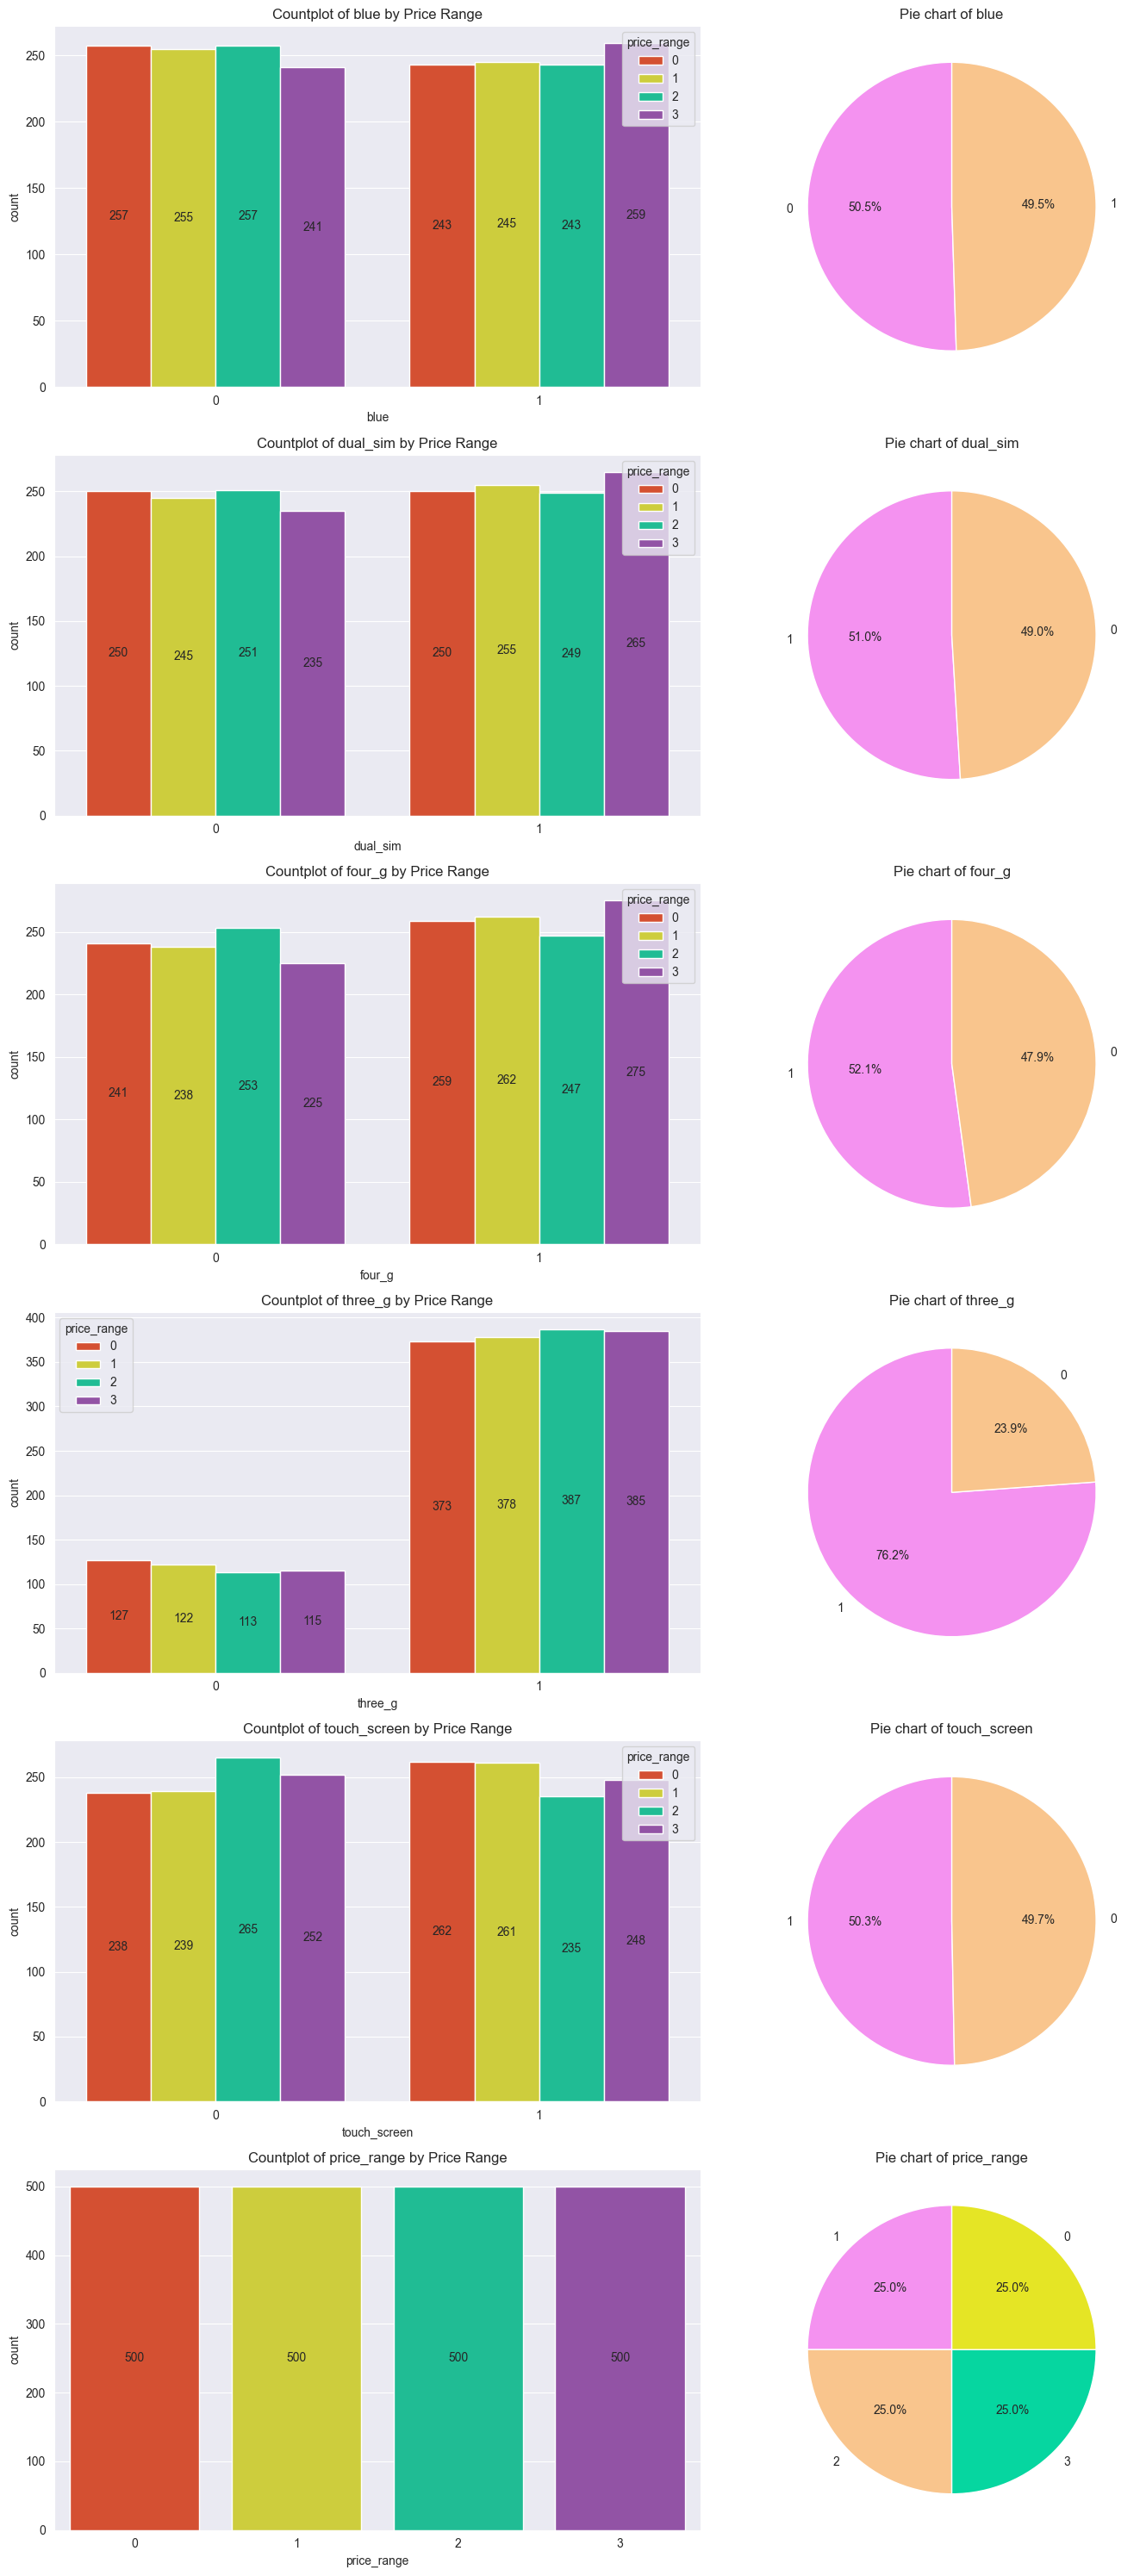

In [13]:
sns.set_style('darkgrid')

list_of_columns = ['blue', 'dual_sim', 'four_g', 'three_g', 'touch_screen', 'price_range']
custom_palette = ['#EF3F17', '#E5E525', '#06d6a0', '#9946b2']
custom_palette_pie = ['#f492f0', '#f9c58d', '#06d6a0', '#E5E525']

# Create a figure with subplots
fig, axs = plt.subplots(len(list_of_columns), 2, figsize=(15, 30))

for i, column_name in enumerate(list_of_columns):
    # Countplot
    if column_name != 'price_range' :
        ax = sns.countplot(data=df, x=column_name, hue='price_range', palette=custom_palette, ax=axs[i, 0])
        axs[i, 0].set_title(f'Countplot of {column_name} by Price Range')

        # Add count labels to the bars
        for container in ax.containers:
            ax.bar_label(container, label_type='center')

        # Pie chart
        column_data = df[column_name].value_counts()
        axs[i, 1].pie(column_data, labels=column_data.index, autopct='%1.1f%%', startangle=90, colors=custom_palette_pie)
        axs[i, 1].set_title(f'Pie chart of {column_name}')
    
    else :
        ax = sns.countplot(data=df, x=column_name, palette=custom_palette, ax=axs[i, 0])
        axs[i, 0].set_title(f'Countplot of {column_name} by Price Range')

        # Add count labels to the bars
        for container in ax.containers:
            ax.bar_label(container, label_type='center')

        # Pie chart
        column_data = df[column_name].value_counts()
        axs[i, 1].pie(column_data, labels=column_data.index, autopct='%1.1f%%', startangle=90, colors=custom_palette_pie)
        axs[i, 1].set_title(f'Pie chart of {column_name}')

# Adjust layout to prevent overlap
plt.tight_layout()

# Display all plots
plt.show()

    <a id="DT"></a>
    # <p style="background-color:powderblue; font-family:roboto; color:navy; font-size:145%;font-weight:bold; text-align:center; border-radius:25px 10px; padding: 10px">6 - Decision Tree📊</p>

    ⬆️ [Table of Contents](#c_table)

criterion max_features  n_depth  Accuracy  Precision    Recall  f1_Score
0    entropy         None        6     0.812   0.807126  0.805654  0.805246
1    entropy         None        5     0.806   0.804684  0.803061  0.802588
2       gini         None        6     0.794   0.791476  0.790947  0.790607
3    entropy         None        7     0.792   0.790078  0.787446  0.788170
4       gini         None        5     0.790   0.790489  0.789311  0.788992
..       ...          ...      ...       ...        ...       ...       ...
85      gini         log2        5     0.412   0.405835  0.400548  0.367113
86      gini         log2        1     0.264   0.137447  0.257418  0.158325
87      gini         sqrt        1     0.264   0.137447  0.257418  0.158325
88   entropy         sqrt        1     0.264   0.137447  0.257418  0.158325
89   entropy         log2        1     0.264   0.137447  0.257418  0.158325

[90 rows x 7 columns]


The best result is for criterion: entropy with depth of 6 which has accuracy of: 0.812




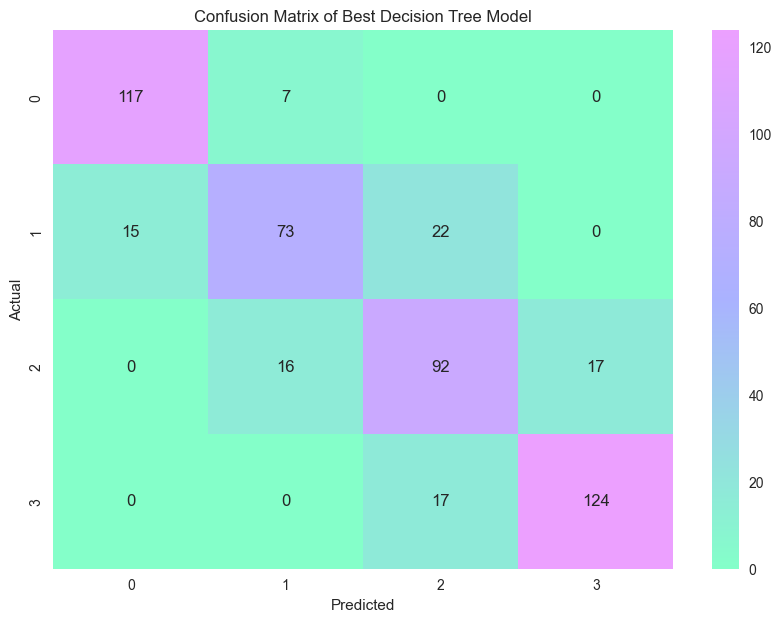

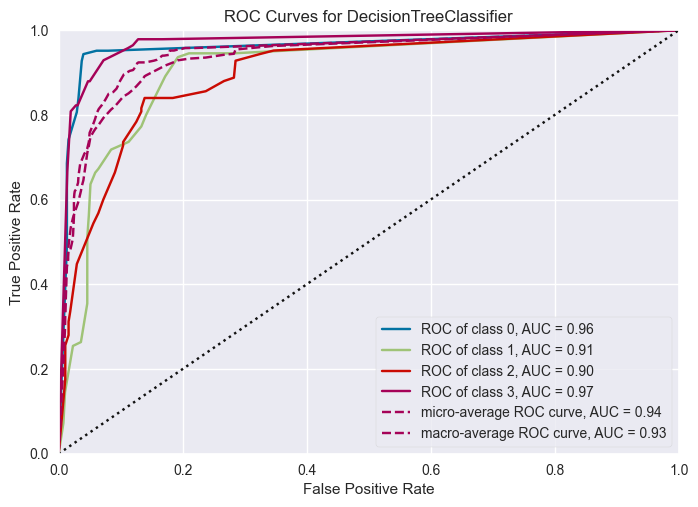

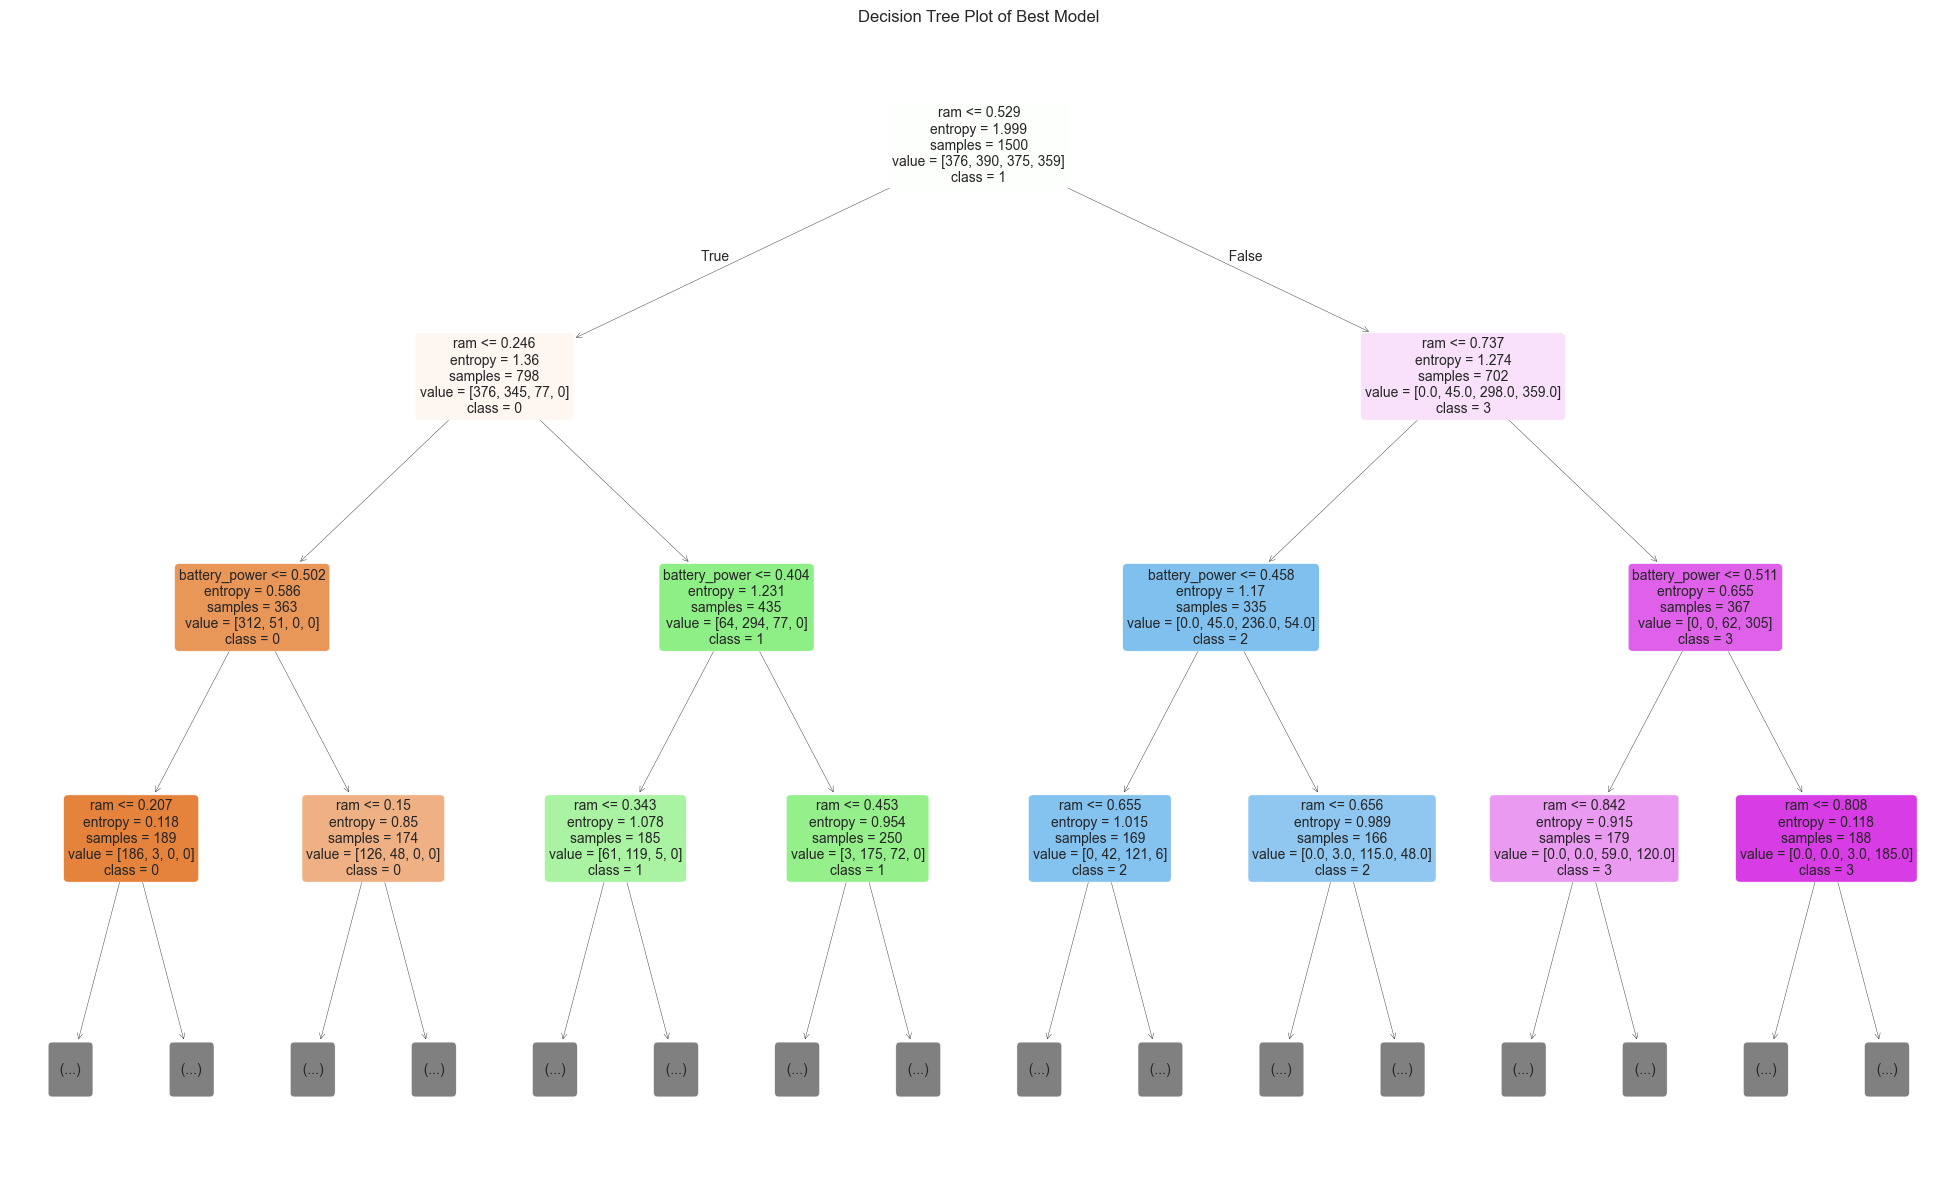

In [18]:
results = []

# Drop target and unrelated columns from the dataframe
X = df.drop(columns=['price_range', 'performance'])
y = df.price_range.values.reshape(-1, 1)

# Normalize the feature data
scaler = MinMaxScaler(feature_range=(0, 1))
norm_x = scaler.fit_transform(X)
X_norm = pd.DataFrame(norm_x, columns=list(X.columns))

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.25, random_state=0)

# Iterate through different hyperparameters to find the best model
for criterion in ['gini', 'entropy']:
    for max_features in ['sqrt', 'log2', None]:
        for n_depth in range(1, 16):
            # Initialize and train the Decision Tree Classifier
            clf = DecisionTreeClassifier(max_depth=n_depth, criterion=criterion, max_features=max_features, random_state=0)
            clf.fit(x_train, y_train)
            y_pred = clf.predict(x_test)
            
            # Evaluate the model
            cm = metrics.confusion_matrix(y_test, y_pred)
            accuracy = metrics.accuracy_score(y_test, y_pred)
            precision = metrics.precision_score(y_test, y_pred, average='macro', zero_division=0)
            recall = metrics.recall_score(y_test, y_pred, average='macro', zero_division=0)
            f1 = metrics.f1_score(y_test, y_pred, average='macro')
            
            # Store the results
            results.append((criterion, max_features, n_depth, accuracy, precision, recall, f1, cm))

# Convert the results into a DataFrame
results_df = pd.DataFrame(results, columns=['criterion', 'max_features', 'n_depth', 'Accuracy', 'Precision', 'Recall', 'f1_Score', 'Confusion Matrix'])

# Sort the results by accuracy in descending order
results_df.sort_values(by='Accuracy', ascending=False, inplace=True)
results_df.reset_index(drop=True, inplace=True)

# Display the sorted results
display(results_df.drop(columns=['Confusion Matrix']))

# Print the best model's details
print(f'\nThe best result is for criterion: {results_df["criterion"][0]} with depth of {results_df["n_depth"][0]} which has accuracy of:', results_df['Accuracy'][0])
print('\n')

# Get the confusion matrix of the best model
best_cm = results_df['Confusion Matrix'][0]

# Define a custom color map
colors = ['#84ffc9', '#aab2ff', '#eca0ff']
cmap = mcolors.LinearSegmentedColormap.from_list('custom_cmap', colors)

# Plot the confusion matrix of the best model
plt.figure(figsize=(10, 7))
sns.heatmap(best_cm, annot=True, fmt='d', cmap=cmap, xticklabels=[0, 1, 2, 3], yticklabels=[0, 1, 2, 3])
plt.title('Confusion Matrix of Best Decision Tree Model')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# Retrain the best model to plot the ROC curve and decision tree
best_depth = results_df["n_depth"][0]
best_criterion = results_df["criterion"][0]
best_max_features = results_df["max_features"][0]

best_clf = DecisionTreeClassifier(max_depth=best_depth, criterion=best_criterion, max_features=best_max_features, random_state=0)
best_clf.fit(x_train, y_train)
y_pred_best = best_clf.predict(x_test)

# Plot the ROC curve for the best model
visualizer = ROCAUC(best_clf, classes=[0, 1, 2, 3])
visualizer.fit(x_train, y_train)
visualizer.score(x_test, y_test)
visualizer.show()

# Plot the decision tree for the best model
plt.figure(figsize=(25, 15))
plot_tree(best_clf, filled=True, feature_names=X.columns, class_names=['0', '1', '2', '3'], rounded=True, fontsize=10, max_depth=3)
plt.title('Decision Tree Plot of Best Model')
plt.show()

<div style="border-radius: 10px; padding: 10px; background-color: #c0e5e9; font-size: 115%; text-align: left;">
    <p style="color: navy;">
        By evaluating various hyperparameters for the Decision Tree Classifier, we found that the best model uses the 'entropy' criterion with no max_features restriction and a max_depth of 6, achieving an accuracy of 0.812. This model also has high precision, recall, and F1 score.
    </p>
</div>

criterion max_features  n_depth  Accuracy  Precision    Recall  f1_Score
0    entropy         None        6     0.808   0.803054  0.801911  0.801706
1    entropy         None        5     0.806   0.804684  0.803061  0.802588
2    entropy         None        7     0.804   0.798503  0.797817  0.797647
3       gini         None        7     0.796   0.792275  0.793449  0.792488
4       gini         None        6     0.796   0.793269  0.792720  0.792320
..       ...          ...      ...       ...        ...       ...       ...
85      gini         log2        1     0.264   0.137447  0.257418  0.158325
86   entropy         sqrt        1     0.264   0.137447  0.257418  0.158325
87   entropy         log2        1     0.264   0.137447  0.257418  0.158325
88      gini         log2        3     0.262   0.300069  0.262653  0.215519
89      gini         sqrt        3     0.262   0.300069  0.262653  0.215519

[90 rows x 7 columns]


The best result is for criterion: entropy with depth of 6 which has accuracy of: 0.808




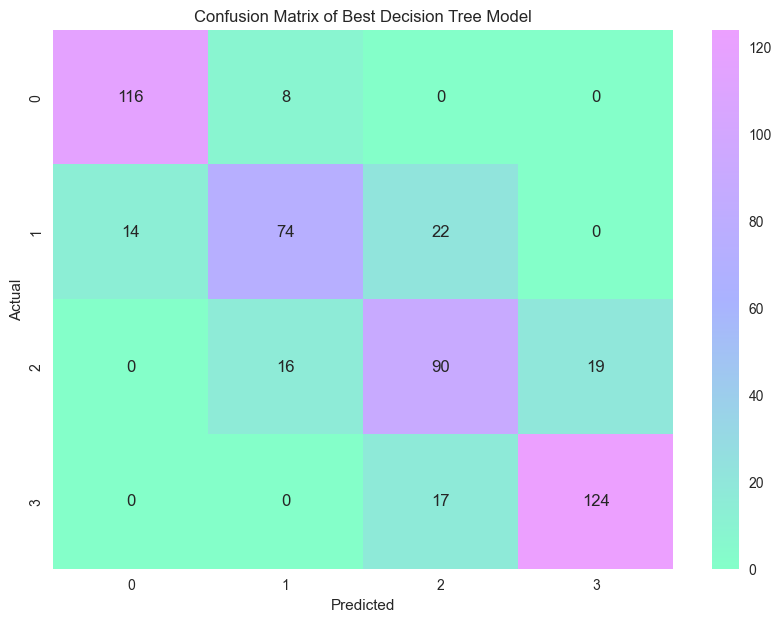

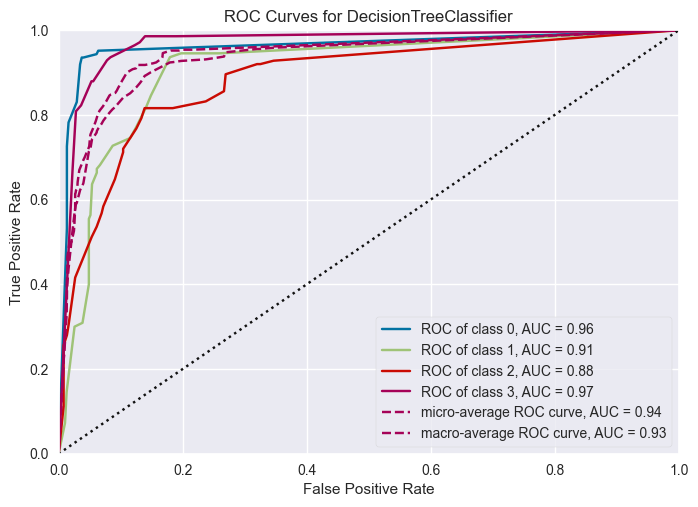

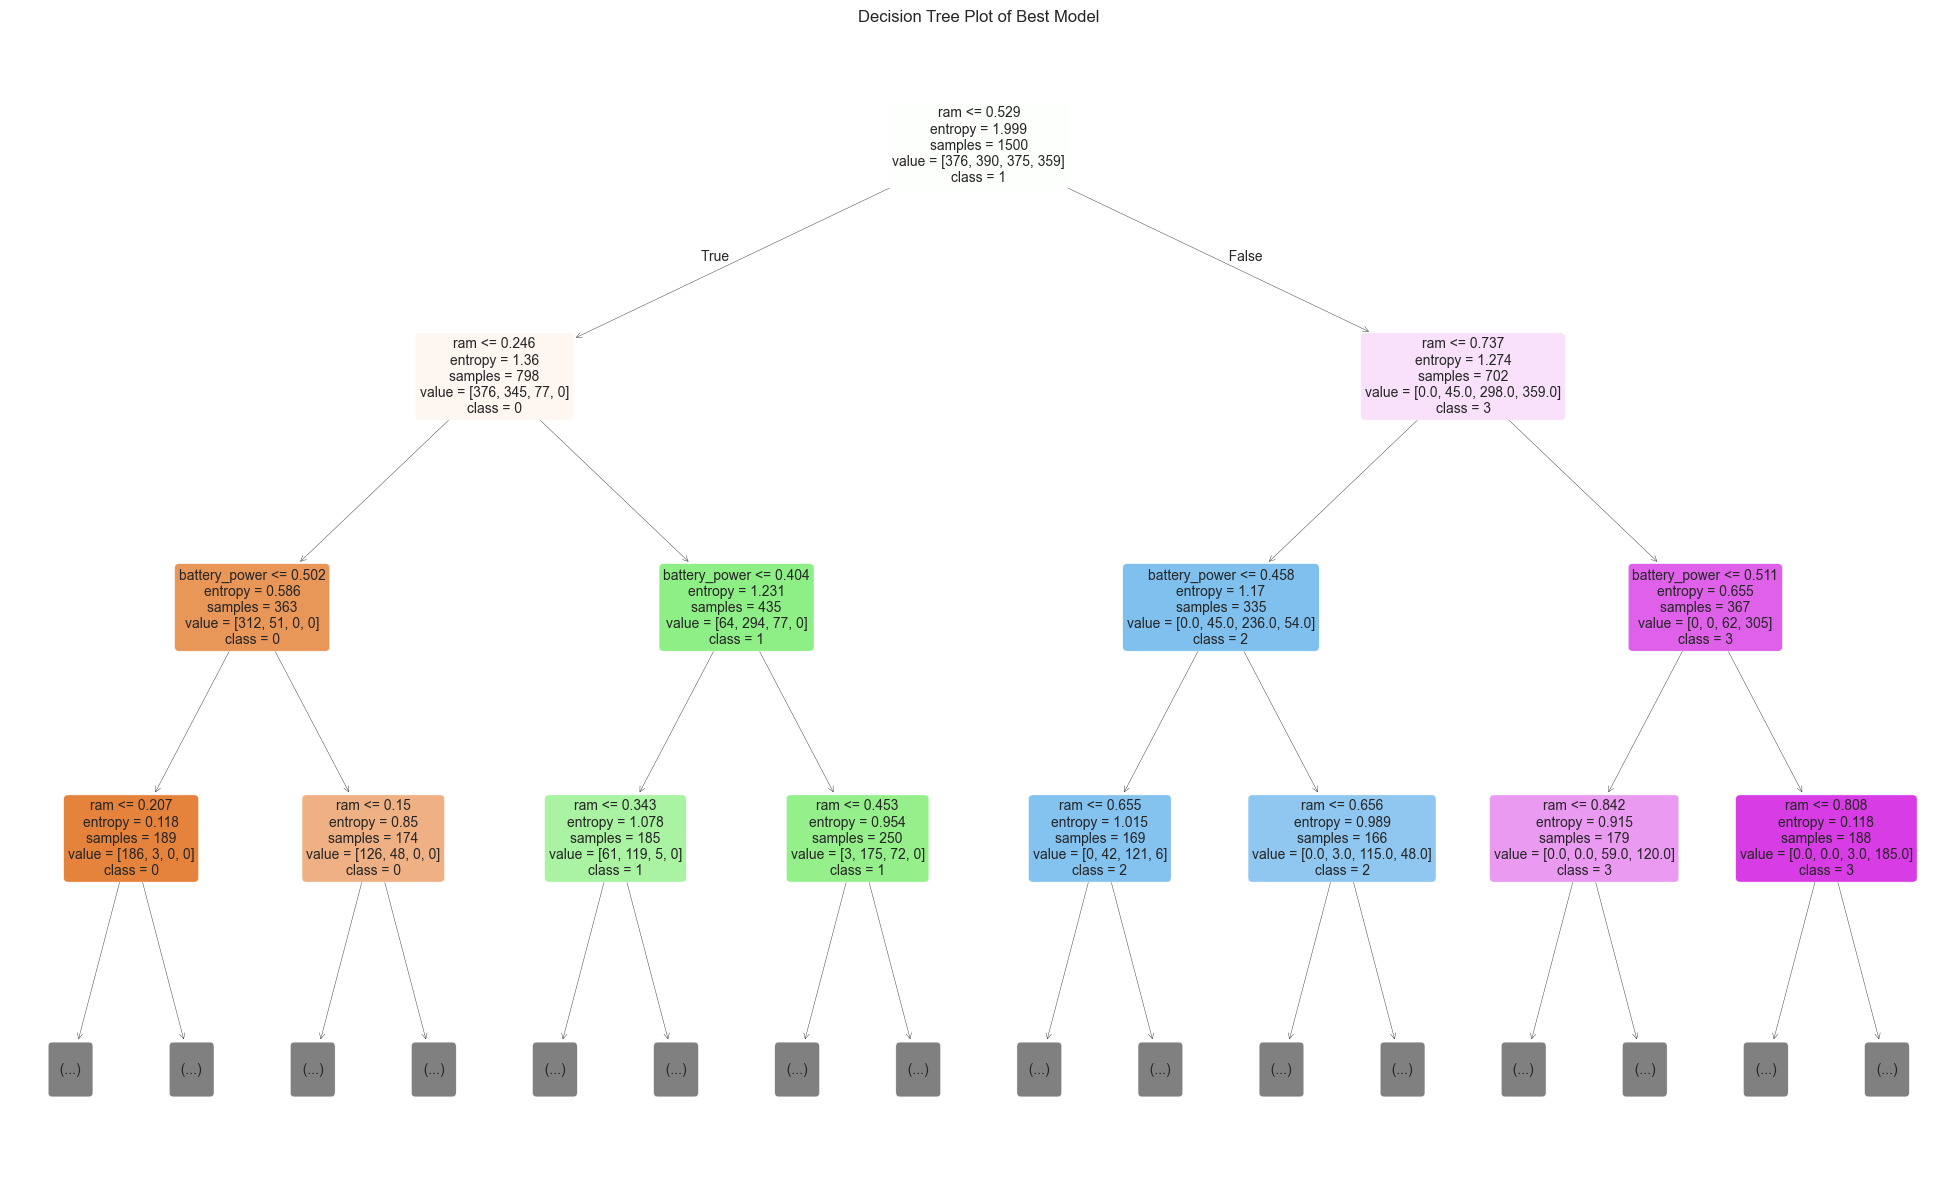

In [19]:
results = []

# Drop target and unrelated columns from the dataframe
X = df.drop(columns=['price_range', 'n_cores', 'clock_speed'])
y = df.price_range.values.reshape(-1, 1)

# Normalize the feature data
scaler = MinMaxScaler(feature_range=(0, 1))
norm_x = scaler.fit_transform(X)
X_norm = pd.DataFrame(norm_x, columns=list(X.columns))

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.25, random_state=0)

# Iterate through different hyperparameters to find the best model
for criterion in ['gini', 'entropy']:
    for max_features in ['sqrt', 'log2', None]:
        for n_depth in range(1, 16):
            # Initialize and train the Decision Tree Classifier
            clf = DecisionTreeClassifier(max_depth=n_depth, criterion=criterion, max_features=max_features, random_state=0)
            clf.fit(x_train, y_train)
            y_pred = clf.predict(x_test)
            
            # Evaluate the model
            cm = metrics.confusion_matrix(y_test, y_pred)
            accuracy = metrics.accuracy_score(y_test, y_pred)
            precision = metrics.precision_score(y_test, y_pred, average='macro', zero_division=0)
            recall = metrics.recall_score(y_test, y_pred, average='macro', zero_division=0)
            f1 = metrics.f1_score(y_test, y_pred, average='macro')
            
            # Store the results
            results.append((criterion, max_features, n_depth, accuracy, precision, recall, f1, cm))

# Convert the results into a DataFrame
results_df = pd.DataFrame(results, columns=['criterion', 'max_features', 'n_depth', 'Accuracy', 'Precision', 'Recall', 'f1_Score', 'Confusion Matrix'])

# Sort the results by accuracy in descending order
results_df.sort_values(by='Accuracy', ascending=False, inplace=True)
results_df.reset_index(drop=True, inplace=True)

# Display the sorted results
display(results_df.drop(columns=['Confusion Matrix']))

# Print the best model's details
print(f'\nThe best result is for criterion: {results_df["criterion"][0]} with depth of {results_df["n_depth"][0]} which has accuracy of:', results_df['Accuracy'][0])
print('\n')

# Get the confusion matrix of the best model
best_cm = results_df['Confusion Matrix'][0]

# Define a custom color map
colors = ['#84ffc9', '#aab2ff', '#eca0ff']
cmap = mcolors.LinearSegmentedColormap.from_list('custom_cmap', colors)

# Plot the confusion matrix of the best model
plt.figure(figsize=(10, 7))
sns.heatmap(best_cm, annot=True, fmt='d', cmap=cmap, xticklabels=[0, 1, 2, 3], yticklabels=[0, 1, 2, 3])
plt.title('Confusion Matrix of Best Decision Tree Model')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# Retrain the best model to plot the ROC curve and decision tree
best_depth = results_df["n_depth"][0]
best_criterion = results_df["criterion"][0]
best_max_features = results_df["max_features"][0]

best_clf = DecisionTreeClassifier(max_depth=best_depth, criterion=best_criterion, max_features=best_max_features, random_state=0)
best_clf.fit(x_train, y_train)
y_pred_best = best_clf.predict(x_test)

# Plot the ROC curve for the best model
visualizer = ROCAUC(best_clf, classes=[0, 1, 2, 3])
visualizer.fit(x_train, y_train)
visualizer.score(x_test, y_test)
visualizer.show()

# Plot the decision tree for the best model
plt.figure(figsize=(25, 15))
plot_tree(best_clf, filled=True, feature_names=X.columns, class_names=['0', '1', '2', '3'], rounded=True, fontsize=10, max_depth=3)
plt.title('Decision Tree Plot of Best Model')
plt.show()

<div style="border-radius: 10px; padding: 10px; background-color: #c0e5e9; font-size: 115%; text-align: left;">
    <p style="color: navy;">
        This accuracy is lower compared to the model that included 'clock_speed' and 'n_cores', indicating that these features are significant for predicting the price range of mobile phones.
    </p>
</div>

<a id="RF"></a>
# <p style="background-color:powderblue; font-family:roboto; color:navy; font-size:145%;font-weight:bold; text-align:center; border-radius:25px 10px; padding: 10px">7 - Random Forest📊</p>

⬆️ [Table of Contents](#c_table)

n_estimators criterion max_features  n_depth  Accuracy  Precision  \
0             100      gini         None        5     0.836   0.829667   
1             500      gini         None        5     0.834   0.827398   
2             100   entropy         None       10     0.834   0.828053   
3             500      gini         None        6     0.832   0.825960   
4             200      gini         None        5     0.832   0.825375   
..            ...       ...          ...      ...       ...        ...   
355            50      gini         None        1     0.536   0.559310   
356           500      gini         None        1     0.532   0.390944   
357           200      gini         None        1     0.532   0.390944   
358           500   entropy         None        1     0.532   0.390944   
359           200   entropy         None        1     0.532   0.390944   

       Recall  f1_Score  
0    0.830988  0.829884  
1    0.828715  0.827690  
2    0.828745  0.827599  
3    0.827169  0.826292  
4    0.826715  0.825592  
..        ...       ...  
355  0.506273  0.360627  
356  0.502000  0.350900  
357  0.502000  0.350900  
358  0.502000  0.350900  
359  0.502000  0.350900  

[360 rows x 8 columns]


The best result is for criterion: gini with depth of 5 which has accuracy of: 0.836




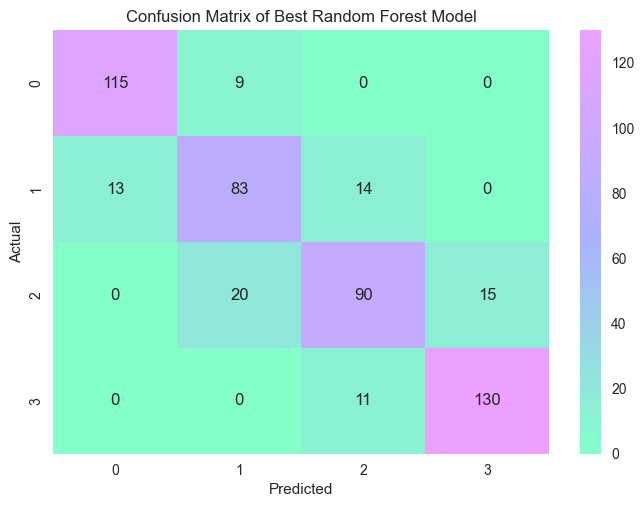

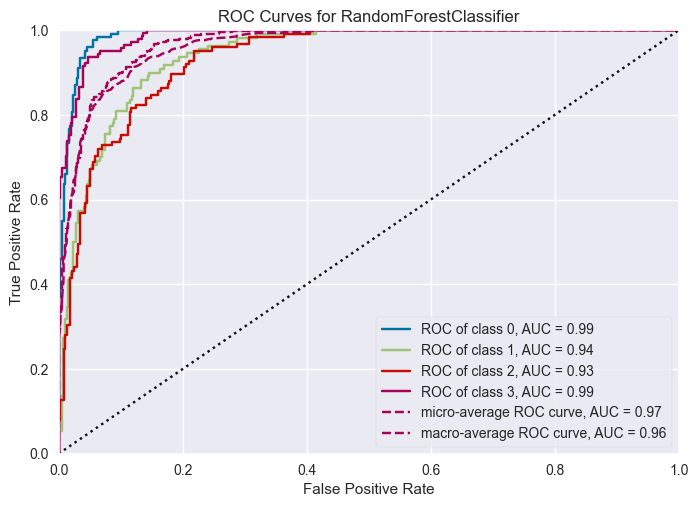

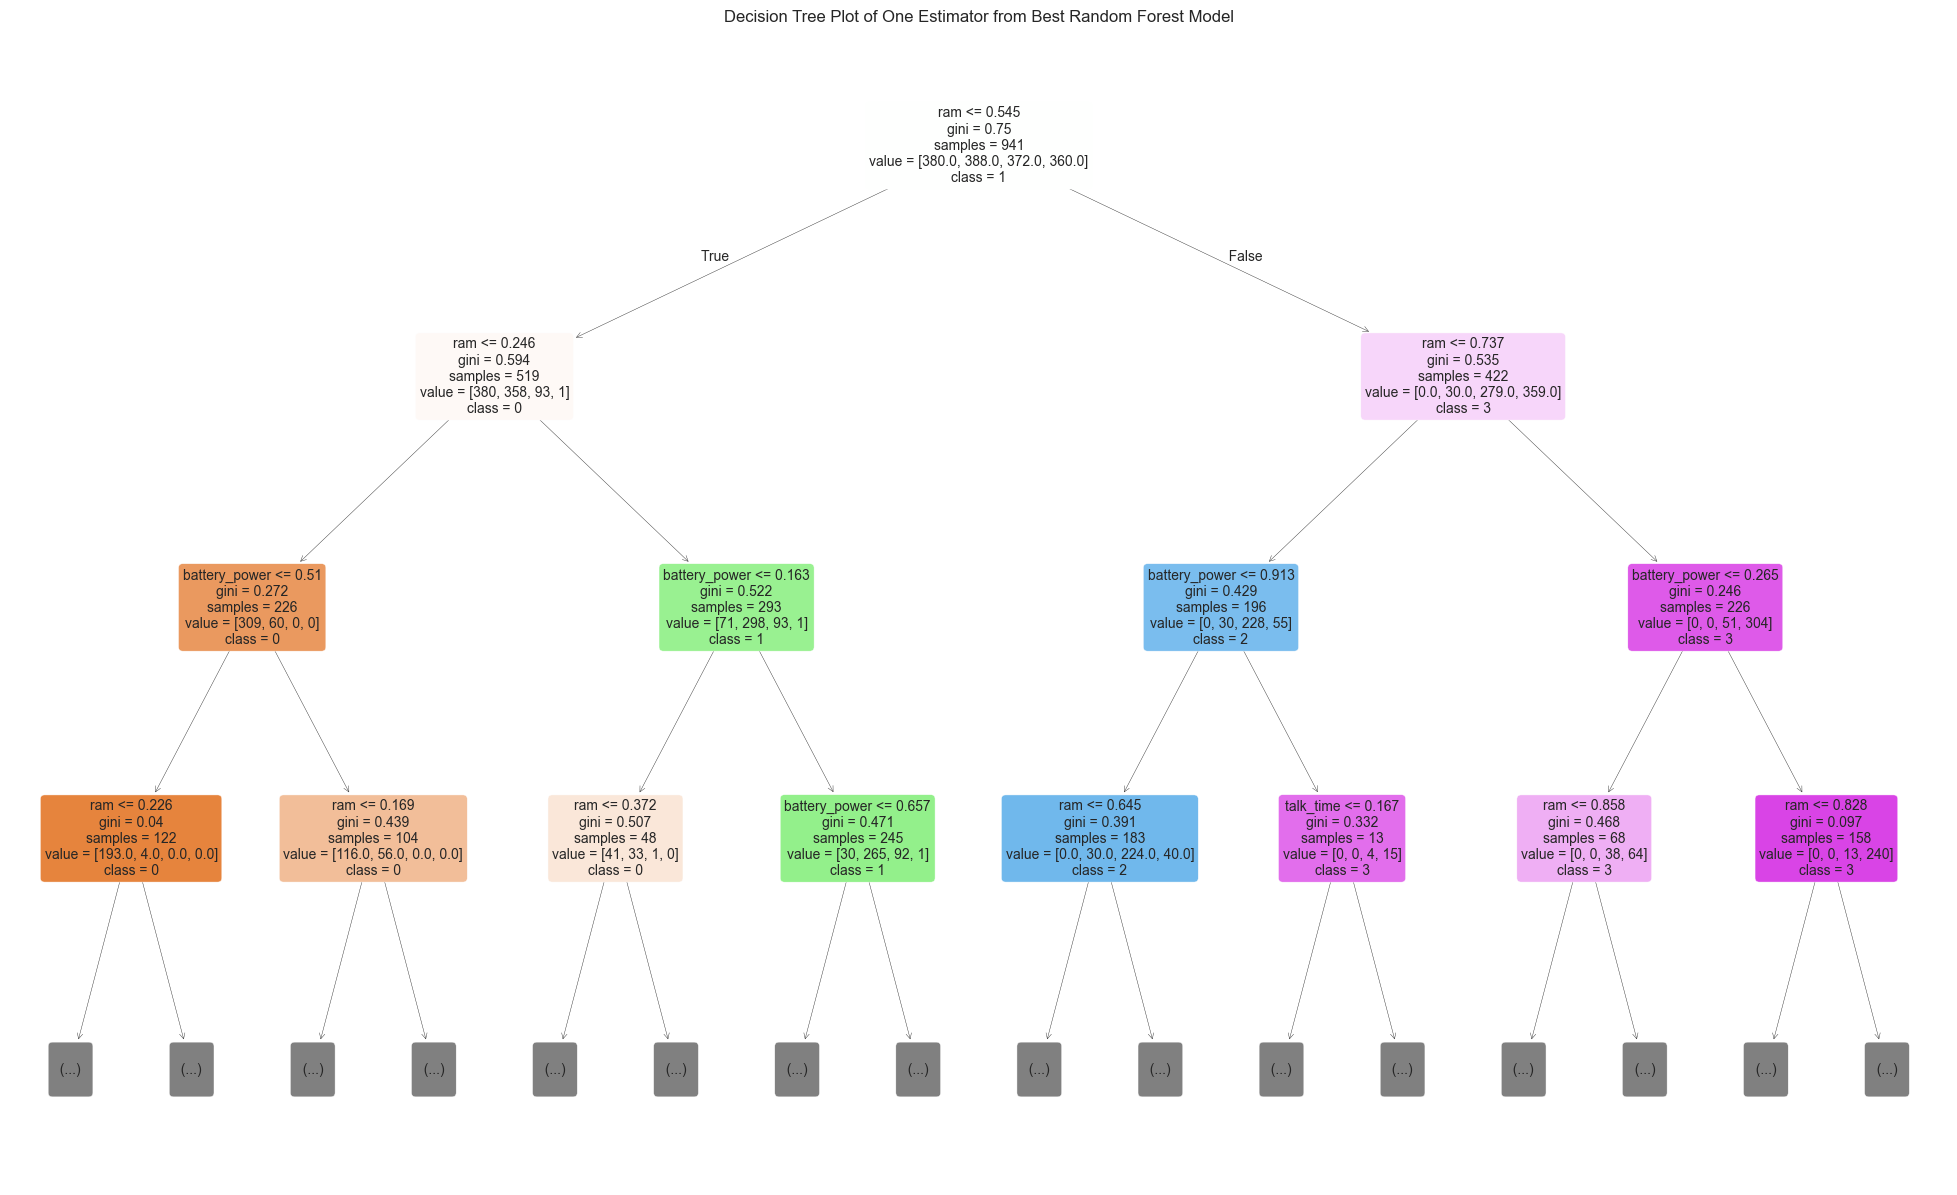

In [21]:
results = []

# Drop 'price_range' and 'performance' columns from the features
X = df.drop(columns=['price_range', 'performance'])
y = df.price_range.values.reshape(-1, 1)

# Normalize the features
Scaler = MinMaxScaler(feature_range=(0, 1))
norm_x = Scaler.fit_transform(X)
X_norm = pd.DataFrame(norm_x, columns=list(X.columns))

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.25, random_state=0)

# Iterate over different hyperparameter combinations
for criterion in ['gini', 'entropy']:
    for max_features in ['sqrt', 'log2', None]:
        for n_depth in range(1, 16):
            for n_estimators in [50, 100, 200, 500]:
                clf = RandomForestClassifier(n_estimators=n_estimators, max_depth=n_depth, criterion=criterion, max_features=max_features, random_state=0)
                clf.fit(x_train, y_train.ravel())
                y_pred = clf.predict(x_test)
                cm = metrics.confusion_matrix(y_test, y_pred)
                accuracy = metrics.accuracy_score(y_test, y_pred)
                precision = metrics.precision_score(y_test, y_pred, average='macro', zero_division=0)
                recall = metrics.recall_score(y_test, y_pred, average='macro', zero_division=0)
                f1 = metrics.f1_score(y_test, y_pred, average='macro')
                results.append((n_estimators, criterion, max_features, n_depth, accuracy, precision, recall, f1, cm))

# Create a DataFrame to store results
results_df = pd.DataFrame(results, columns=['n_estimators', 'criterion', 'max_features', 'n_depth', 'Accuracy', 'Precision', 'Recall', 'f1_Score', 'Confusion Matrix'])

# Sort results by accuracy
results_df.sort_values(by='Accuracy', ascending=False, inplace=True)
results_df.reset_index(drop=True, inplace=True)

# Display results excluding the confusion matrix
display(results_df.drop(columns=['Confusion Matrix']))

# Print the best result
print(f'\nThe best result is for criterion: {results_df["criterion"][0]} with depth of {results_df["n_depth"][0]} which has accuracy of:', results_df['Accuracy'][0])
print('\n')

# Get the best confusion matrix
best_cm = results_df['Confusion Matrix'][0]

# Define colors for heatmap
colors = ['#84ffc9', '#aab2ff', '#eca0ff']
cmap = mcolors.LinearSegmentedColormap.from_list('custom_cmap', colors)

# Plot confusion matrix
sns.heatmap(best_cm, annot=True, fmt='d', cmap=cmap, xticklabels=[0, 1, 2, 3], yticklabels=[0, 1, 2, 3])
plt.title('Confusion Matrix of Best Random Forest Model')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# Train the best Random Forest model
best_depth = results_df["n_depth"][0]
best_criterion = results_df["criterion"][0]
best_max_features = results_df["max_features"][0]
best_clf = RandomForestClassifier(n_estimators=100, max_depth=best_depth, criterion=best_criterion, max_features=best_max_features, random_state=0)
best_clf.fit(x_train, y_train.ravel())
y_pred_best = best_clf.predict(x_test)

# Visualize the ROC-AUC
visualizer = ROCAUC(best_clf, classes=[0, 1, 2, 3])
visualizer.fit(x_train, y_train)
visualizer.score(x_test, y_test)
visualizer.show()

# Extract a single tree from the Random Forest
estimator = best_clf.estimators_[0]

# Plot the decision tree
plt.figure(figsize=(25, 15))
plot_tree(estimator, filled=True, feature_names=X.columns, class_names=['0', '1', '2', '3'], rounded=True, fontsize=10, max_depth=3)
plt.title('Decision Tree Plot of One Estimator from Best Random Forest Model')
plt.show()

<div style="border-radius: 10px; padding: 10px; background-color: #c0e5e9; font-size: 115%; text-align: left;">
    <p style="color: navy;">
        By evaluating various hyperparameters for the Random Forest Classifier without the 'performance' feature, we found that the best model uses the 'gini' criterion with no max_features restriction and a max_depth of 5, achieving an accuracy of 0.836. This indicates that the Random Forest model is effective in predicting the price range of mobile phones and performs better than the Decision Tree models tested previously.
    </p>
</div>

<a id="svm"></a>
# <p style="background-color:powderblue; font-family:roboto; color:navy; font-size:145%;font-weight:bold; text-align:center; border-radius:25px 10px; padding: 10px">8 - SVM📊</p>

⬆️ [Table of Contents](#c_table)

In [ ]:
results = []

# Drop target and unrelated columns from the dataframe
X = df.drop(columns=['price_range', 'performance'])
y = df.price_range.values.reshape(-1, 1)

# Normalize the feature data
scaler = MinMaxScaler(feature_range=(0, 1))
norm_x = scaler.fit_transform(X)
X_norm = pd.DataFrame(norm_x, columns=list(X.columns))

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.25, random_state=0)

# Iterate through different hyperparameters to find the best model
for kernel in ['linear', 'poly', 'rbf', 'sigmoid']:
    for C in [0.1, 1, 10]:
        for gamma in ['scale', 'auto']:
            # Initialize and train the SVM Classifier
            clf = SVC(kernel=kernel, C=C, gamma=gamma, random_state=0)
            clf.fit(x_train, y_train)
            y_pred = clf.predict(x_test)
            
            # Evaluate the model
            cm = metrics.confusion_matrix(y_test, y_pred)
            accuracy = metrics.accuracy_score(y_test, y_pred)
            precision = metrics.precision_score(y_test, y_pred, average='macro', zero_division=0)
            recall = metrics.recall_score(y_test, y_pred, average='macro', zero_division=0)
            f1 = metrics.f1_score(y_test, y_pred, average='macro')
            
            # Store the results
            results.append((kernel, C, gamma, accuracy, precision, recall, f1, cm))

# Convert the results into a DataFrame
results_df = pd.DataFrame(results, columns=['kernel', 'C', 'gamma', 'Accuracy', 'Precision', 'Recall', 'f1_Score', 'Confusion Matrix'])

# Sort the results by accuracy in descending order
results_df.sort_values(by='Accuracy', ascending=False, inplace=True)
results_df.reset_index(drop=True, inplace=True)

# Display the sorted results
display(results_df.drop(columns=['Confusion Matrix']))

# Print the best model's details
print(f'\nThe best result is for kernel: {results_df["kernel"][0]}, C: {results_df["C"][0]}, gamma: {results_df["gamma"][0]} which has accuracy of:', results_df['Accuracy'][0])
print('\n')

# Get the confusion matrix of the best model
best_cm = results_df['Confusion Matrix'][0]

# Define a custom color map
colors = ['#84ffc9', '#aab2ff', '#eca0ff']
cmap = mcolors.LinearSegmentedColormap.from_list('custom_cmap', colors)

# Plot the confusion matrix of the best model
plt.figure(figsize=(10, 7))
sns.heatmap(best_cm, annot=True, fmt='d', cmap=cmap, xticklabels=[0, 1, 2, 3], yticklabels=[0, 1, 2, 3])
plt.title('Confusion Matrix of Best SVM Model')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# Retrain the best model to plot the ROC curve
best_kernel = results_df["kernel"][0]
best_C = results_df["C"][0]
best_gamma = results_df["gamma"][0]

best_clf = SVC(kernel=best_kernel, C=best_C, gamma=best_gamma, random_state=0, probability=True)
best_clf.fit(x_train, y_train)
y_pred_best = best_clf.predict(x_test)

# Plot the ROC curve for the best model
visualizer = ROCAUC(best_clf, classes=[0, 1, 2, 3])
visualizer.fit(x_train, y_train)
visualizer.score(x_test, y_test)
visualizer.show();

<div style="border-radius: 10px; padding: 10px; background-color: #c0e5e9; font-size: 115%; text-align: left;">
    <p style="color: navy;">
        After evaluating various hyperparameter combinations for the SVM Classifier without the 'performance' feature, we determined that the best model uses a 'linear' kernel, with a C value of 1.0 and 'gamma' set to 'scale'. This configuration achieved an accuracy of 0.844. This result indicates that the SVM model is highly effective in predicting the price range of mobile phones, and outperforms the previously tested Decision Tree and Random Forest models. The linear kernel's superior performance suggests that the relationship between the features and the target variable is likely linear or close to linear.
    </p>
</div>

In [ ]:
train_sizes, train_scores, test_scores = learning_curve(best_clf, X_norm, y.ravel(), cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10))

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10, 7))
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")

plt.title('Learning Curve')
plt.xlabel('Training Examples')
plt.ylabel('Score')
plt.legend(loc="best")
plt.show()

<a id="Predict"></a>
# <p style="background-color:powderblue; font-family:roboto; color:navy; font-size:145%;font-weight:bold; text-align:center; border-radius:25px 10px; padding: 10px">9 - predict unseen data💸</p>

⬆️ [Table of Contents](#c_table)

In [ ]:
X = df.drop(columns=['price_range', 'performance'])
y = df.price_range.values.reshape(-1, 1)

scaler = MinMaxScaler(feature_range=(0, 1))
norm_x = scaler.fit_transform(X)
X = pd.DataFrame(norm_x, columns=list(X.columns))

test_df1 = test_df.drop(columns = ['id', 'm_dep', 'sc_h', 'sc_w', 'px_height', 'px_width'])
norm_test = scaler.transform(test_df1)
test_df1 = pd.DataFrame(norm_test, columns=list(test_df1.columns))

clf = SVC(kernel='linear', C = 1.0, gamma = 'scale', random_state=0)
clf.fit(X, y)
y_pred = clf.predict(test_df1)

test_df['price_range_pred'] = y_pred

test_df

In [ ]:
test_df[['id', 'price_range_pred']]

<font style="font-family:'Times New Roman', serif; font-size:200%;font-weight:bold;color:magenta;"> Best Regards!</font><br>